# All protocol consolidation

## Importing other Python Libraries/Modules

In [1]:
import re
import os
import sys
import string
from collections import defaultdict
import glob
import warnings
from datetime import datetime
from datetime import timedelta
import ast
import itertools

In [2]:
import matplotlib.pyplot as plt
from matplotlib import ticker
import numpy as np
import pandas as pd
import xlrd
import seaborn as sn

In [3]:
# setting path
sys.path.append('../../src')

In [4]:
from eloscore import eloscore

In [5]:
# Increase size of plot in jupyter

plt.rcParams["figure.figsize"] = (18,10)

# Summary

- Experiment

- Data

- Purpose of this Jupyter Notebook


In [6]:
all_final_elo_score_file_paths = glob.glob("./pilot*/**/*final_elo_score*.csv", recursive=True)

In [7]:
all_final_elo_score_file_paths

['./pilot_1/proc/elo_score_spread_sheets/tube_test_elo_score/cage_1_2_3_4_date_2022-04-25_2022-05-20/tube_test_final_elo_score_cages_1_2_3_4_date_2022-04-25_2022-05-20.csv',
 './pilot_1/proc/elo_score_spread_sheets/home_cage_observation_elo_score/cage_3_4_date_2022-05-02_2022-05-13/home_cage_observation_final_elo_score_cages_3_4_date_2022-05-02_2022-05-13.csv',
 './pilot_1/proc/elo_score_spread_sheets/reward_competition_elo_score/cage_1_2_3_4_date_20220519_20220520/reward_competition_final_elo_score_cages_1_2_3_4_date_20220519_20220520.csv',
 './pilot_1/proc/elo_score_spread_sheets/urine_marking_elo_score/cage_1_2_3_4_date_2022-05-18_2022-06-01/urine_marking_final_elo_score_cages_1_2_3_4_date_2022-05-18_2022-06-01.csv',
 './pilot_2/proc/elo_score_spread_sheets/tube_test_elo_score/cage_1_2_3_4_5_6_date_2022-07-11_2022-07-29/tube_test_final_elo_score_cages_1_2_3_4_5_6_date_2022-07-11_2022-07-29.csv',
 './pilot_2/proc/elo_score_spread_sheets/home_cage_observation_elo_score/cage_1_2_3_4_5_

In [8]:
len(all_final_elo_score_file_paths)

12

In [9]:
all_final_elo_score_df = []
for file_path in all_final_elo_score_file_paths:
    per_experiment_df = pd.read_csv(file_path, index_col=0)
    per_experiment_df["subject_id"] = per_experiment_df["subject_id"].astype(float).astype(str)
    print(file_path)
    print(per_experiment_df["subject_id"].unique())
    all_final_elo_score_df.append(per_experiment_df)

./pilot_1/proc/elo_score_spread_sheets/tube_test_elo_score/cage_1_2_3_4_date_2022-04-25_2022-05-20/tube_test_final_elo_score_cages_1_2_3_4_date_2022-04-25_2022-05-20.csv
['1.1' '1.2' '1.3' '1.4' '2.1' '2.2' '2.3' '2.4' '3.1' '3.2' '3.3' '3.4'
 '4.1' '4.2' '4.3' '4.4']
./pilot_1/proc/elo_score_spread_sheets/home_cage_observation_elo_score/cage_3_4_date_2022-05-02_2022-05-13/home_cage_observation_final_elo_score_cages_3_4_date_2022-05-02_2022-05-13.csv
['3.1' '3.2' '3.3' '3.4' '4.1' '4.2' '4.3' '4.4']
./pilot_1/proc/elo_score_spread_sheets/reward_competition_elo_score/cage_1_2_3_4_date_20220519_20220520/reward_competition_final_elo_score_cages_1_2_3_4_date_20220519_20220520.csv
['1.1' '1.2' '1.3' '1.4' '2.1' '2.2' '2.3' '2.4' '3.1' '3.2' '3.3' '3.4'
 '4.1' '4.2' '4.3' '4.4']
./pilot_1/proc/elo_score_spread_sheets/urine_marking_elo_score/cage_1_2_3_4_date_2022-05-18_2022-06-01/urine_marking_final_elo_score_cages_1_2_3_4_date_2022-05-18_2022-06-01.csv
['1.1' '1.2' '1.3' '1.4' '2.1' '2.2' '

In [10]:
combined_final_elo_score_df = pd.concat(all_final_elo_score_df)
combined_final_elo_score_df = combined_final_elo_score_df.reset_index(drop=True)

In [11]:
combined_final_elo_score_df.head()

,cage,subject_id,final_elo_score,cohort,strain,experiment_type,rank
0,1,1.1,1062.2,pilot_1,C57,tube_test,2.0
1,1,1.2,927.1,pilot_1,C57,tube_test,3.0
2,1,1.3,775.7,pilot_1,C57,tube_test,4.0
3,1,1.4,1235.0,pilot_1,C57,tube_test,1.0
4,2,2.1,1122.6,pilot_1,C57,tube_test,2.0


In [12]:
combined_final_elo_score_df["subject_id"].unique()

array(['1.1', '1.2', '1.3', '1.4', '2.1', '2.2', '2.3', '2.4', '3.1',
       '3.2', '3.3', '3.4', '4.1', '4.2', '4.3', '4.4', '5.1', '5.2',
       '5.3', '5.4', '6.1', '6.2', '6.3', '6.4'], dtype=object)

In [13]:
combined_final_elo_score_df.tail()

,cage,subject_id,final_elo_score,cohort,strain,experiment_type,rank
231,5,5.4,1019.7,pilot_3,CD1,urine_marking,1.0
232,6,6.1,980.6,pilot_3,CD1,urine_marking,3.0
233,6,6.2,980.6,pilot_3,CD1,urine_marking,3.0
234,6,6.3,1028.8,pilot_3,CD1,urine_marking,1.0
235,6,6.4,1010.0,pilot_3,CD1,urine_marking,2.0


In [14]:
# experiment_to_elo_score_df = defaultdict(dict)
all_experiment_df = []
for experiment in combined_final_elo_score_df["experiment_type"].unique():
    experiment_df = combined_final_elo_score_df[combined_final_elo_score_df["experiment_type"] == experiment].copy()
    experiment_df = experiment_df.rename(columns={'final_elo_score': "{}_final_elo_score".format(experiment), 'rank': "{}_rank".format(experiment)})
    experiment_df = experiment_df.drop(columns=["experiment_type"])
    experiment_df["subject_id"] = experiment_df["subject_id"].astype(str)
    experiment_df["cage"] = experiment_df["cage"].astype(str)
    all_experiment_df.append(experiment_df)

merged_final_elo_score_df = None
for experiment_df in all_experiment_df:
    if merged_final_elo_score_df is None:
        merged_final_elo_score_df = experiment_df 
    else:
        merged_final_elo_score_df = pd.merge(experiment_df, merged_final_elo_score_df,  how='right', left_on = ["subject_id", "cohort"], right_on = ["subject_id", "cohort"])
#         break
merged_final_elo_score_df = merged_final_elo_score_df.drop_duplicates(subset=["subject_id", "cohort"], keep="last")
merged_final_elo_score_df = merged_final_elo_score_df.reset_index(drop=True)

/tmp/ipykernel_376/1353013162.py:16: FutureWarning: Passing 'suffixes' which cause duplicate columns {'strain_y', 'cage_y'} in the result is deprecated and will raise a MergeError in a future version.
  merged_final_elo_score_df = pd.merge(experiment_df, merged_final_elo_score_df,  how='right', left_on = ["subject_id", "cohort"], right_on = ["subject_id", "cohort"])


In [15]:
merged_final_elo_score_df.head(n=50)

,cage_x,subject_id,urine_marking_final_elo_score,cohort,strain_x,urine_marking_rank,cage_y,reward_competition_final_elo_score,strain_y,reward_competition_rank,cage_x,home_cage_observation_final_elo_score,strain_x,home_cage_observation_rank,cage_y,tube_test_final_elo_score,strain_y,tube_test_rank
0,1,1.1,1010.3,pilot_1,C57,2.0,1,1165.8,C57,1.0,NaN,NaN,NaN,NaN,1,1062.2,C57,2.0
1,1,1.2,1000.8,pilot_1,C57,3.0,1,1007.3,C57,2.0,NaN,NaN,NaN,NaN,1,927.1,C57,3.0
2,1,1.3,972.0,pilot_1,C57,4.0,1,900.9,C57,4.0,NaN,NaN,NaN,NaN,1,775.7,C57,4.0
3,1,1.4,1016.9,pilot_1,C57,1.0,1,926.0,C57,3.0,NaN,NaN,NaN,NaN,1,1235.0,C57,1.0
4,2,2.1,1037.4,pilot_1,C57,1.0,2,1144.7,C57,1.0,NaN,NaN,NaN,NaN,2,1122.6,C57,2.0
5,2,2.2,972.0,pilot_1,C57,4.0,2,951.4,C57,3.0,NaN,NaN,NaN,NaN,2,947.8,C57,3.0
6,2,2.3,1009.2,pilot_1,C57,2.0,2,921.4,C57,4.0,NaN,NaN,NaN,NaN,2,780.7,C57,4.0
7,2,2.4,981.4,pilot_1,C57,3.0,2,982.5,C57,2.0,NaN,NaN,NaN,NaN,2,1148.9,C57,1.0
8,3,3.1,1010.6,pilot_1,CD1,1.0,3,1132.5,CD1,1.0,3,1185.0,CD1,1.0,3,784.5,CD1,4.0
9,3,3.2,999.4,pilot_1,CD1,3.0,3,963.2,CD1,3.0,3,889.6,CD1,4.0,3,1228.3,CD1,1.0


In [16]:
merged_final_elo_score_df.tail(n=50)

,cage_x,subject_id,urine_marking_final_elo_score,cohort,strain_x,urine_marking_rank,cage_y,reward_competition_final_elo_score,strain_y,reward_competition_rank,cage_x,home_cage_observation_final_elo_score,strain_x,home_cage_observation_rank,cage_y,tube_test_final_elo_score,strain_y,tube_test_rank
14,4,4.3,963.9,pilot_1,CD1,4.0,4,955.1,CD1,3.0,4,924.4,CD1,2.0,4,1108.8,CD1,1.0
15,4,4.4,1046.1,pilot_1,CD1,1.0,4,1033.1,CD1,2.0,4,1288.0,CD1,1.0,4,777.0,CD1,4.0
16,1,1.1,991.9,pilot_2,C57,2.0,1,1193.9,C57,1.0,1,907.5,C57,4.0,1,1149.5,C57,1.0
17,1,1.2,1045.9,pilot_2,C57,1.0,1,1017.3,C57,2.0,1,1191.1,C57,1.0,1,1083.0,C57,2.0
18,1,1.3,972.0,pilot_2,C57,4.0,1,893.9,C57,4.0,1,923.8,C57,3.0,1,998.5,C57,3.0
19,1,1.4,990.2,pilot_2,C57,3.0,1,894.9,C57,3.0,1,977.6,C57,2.0,1,769.0,C57,4.0
20,2,2.1,1010.5,pilot_2,C57,2.0,2,814.8,C57,4.0,2,880.2,C57,4.0,2,997.5,C57,2.0
21,2,2.2,971.7,pilot_2,C57,4.0,2,1006.5,C57,3.0,2,897.1,C57,3.0,2,1035.1,C57,1.0
22,2,2.3,1036.2,pilot_2,C57,1.0,2,1033.5,C57,2.0,2,1317.7,C57,1.0,2,974.8,C57,4.0
23,2,2.4,981.6,pilot_2,C57,3.0,2,1145.2,C57,1.0,2,905.0,C57,2.0,2,992.6,C57,3.0


In [17]:
sorted(merged_final_elo_score_df.columns)

['cage_x',
 'cage_x',
 'cage_y',
 'cage_y',
 'cohort',
 'home_cage_observation_final_elo_score',
 'home_cage_observation_rank',
 'reward_competition_final_elo_score',
 'reward_competition_rank',
 'strain_x',
 'strain_x',
 'strain_y',
 'strain_y',
 'subject_id',
 'tube_test_final_elo_score',
 'tube_test_rank',
 'urine_marking_final_elo_score',
 'urine_marking_rank']

In [18]:
sorted_columns = [ 'cohort',
 'subject_id',
 'home_cage_observation_final_elo_score',
 'home_cage_observation_rank',
 'reward_competition_final_elo_score',
 'reward_competition_rank',
 'tube_test_final_elo_score',
 'tube_test_rank',
 'urine_marking_final_elo_score',
 'urine_marking_rank']

In [19]:
merged_final_elo_score_df = merged_final_elo_score_df[sorted_columns]

In [20]:
merged_final_elo_score_df.to_csv("./proc/combined_final_elo_score_df.csv")

## Combining all the pair wise

In [21]:
all_pairwise_file_paths = glob.glob("./pilot_*/**/*pair*.csv", recursive=True)

In [22]:
all_pairwise_file_paths

['./pilot_1/proc/elo_score_spread_sheets/tube_test_elo_score/cage_1_2_3_4_date_2022-04-25_2022-05-20/pilot_1_tube_test_grouped_by_pairs_cage_1_2_3_4_date_2022-04-25_2022-05-20.csv',
 './pilot_1/proc/elo_score_spread_sheets/home_cage_observation_elo_score/cage_3_4_date_2022-05-02_2022-05-13/pilot_1_home_cage_observation_grouped_by_pairs_cage_3_4_date_2022-05-02_2022-05-13.csv',
 './pilot_1/proc/elo_score_spread_sheets/reward_competition_elo_score/cage_1_2_3_4_date_20220519_20220520/pilot_1_reward_competition_grouped_by_pairs_cage_1_2_3_4_date_20220519_20220520.csv',
 './pilot_1/proc/elo_score_spread_sheets/urine_marking_elo_score/cage_1_2_3_4_date_2022-05-18_2022-06-01/pilot_1_urine_marking_grouped_by_pairs_cage_1_2_3_4_date_2022-05-18_2022-06-01.csv',
 './pilot_2/proc/elo_score_spread_sheets/tube_test_elo_score/cage_1_2_3_4_5_6_date_2022-07-11_2022-07-29/pilot_2_tube_test_grouped_by_pairs_cage_1_2_3_4_5_6_date_2022-07-11_2022-07-29.csv',
 './pilot_2/proc/elo_score_spread_sheets/home_ca

In [23]:
protocols_list = ["urine", "tube", "home_cage", "reward"]

In [24]:
protocol_to_all_df = defaultdict(list)
for protocol in protocols_list:
    for file_path in all_pairwise_file_paths:
        if protocol in file_path:
            protocol_to_all_df[protocol].append(pd.read_csv(file_path, index_col=0))

In [25]:
# protocol_to_concatted_df = defaultdict(dict)
all_protocol_df_list = []
for k, v in protocol_to_all_df.items():
    
#     protocol_to_concatted_df[k] = pd.concat(v)
    all_protocol_df_list.append(pd.concat(v).reset_index(drop=True))

In [26]:
# all_protocol_df_list[0]

all_protocol_df_list[0][all_protocol_df_list[0]["tuple_animal_id"] == "('1.1', '1.2')"]

,tuple_animal_id,first_spot_number,second_spot_number,processed_cage_number,cohort,strain,uma_number_difference,uma_percent_difference,uma_number_tie,uma_percent_tie,uma_number_then_percent_tie,uma_averaged_winner,uma_averaged_loser
0,"('1.1', '1.2')",69.0,10.5,1,pilot_1,C57,58.5,147.169811,False,False,False,1.1,1.2
24,"('1.1', '1.2')",14.0,28.0,1,pilot_2,C57,14.0,66.666667,False,False,False,1.2,1.1
60,"('1.1', '1.2')",1.0,1.0,1,pilot_3,C57,0.0,0.000000,True,True,True,1.2,1.1


In [27]:
all_protocol_df_list[1].head()

,tt_tuple_animal_id,tt_winner,tt_loser,processed_cage_number,cohort,tt_averaged_winner,tt_averaged_loser,tt_winner_count,tt_loser_count,tt_count_difference,tt_match_count,tt_percent_win,tt_percentage_tie
0,"('1.1', '1.2')","['1.1', '1.1', '1.1', '1.2', '1.1', '1.1', '1....","['1.2', '1.2', '1.2', '1.1', '1.2', '1.2', '1....",1,pilot_1,1.1,1.2,13,1,12,14,0.928571,False
1,"('1.1', '1.3')","['1.3', '1.1', '1.1', '1.1', '1.1', '1.1', '1....","['1.1', '1.3', '1.3', '1.3', '1.3', '1.3', '1....",1,pilot_1,1.1,1.3,13,1,12,14,0.928571,False
2,"('1.1', '1.4')","['1.4', '1.4', '1.4', '1.4', '1.4', '1.4', '1....","['1.1', '1.1', '1.1', '1.1', '1.1', '1.1', '1....",1,pilot_1,1.4,1.1,14,0,14,14,1.000000,False
3,"('1.2', '1.3')","['1.2', '1.3', '1.2', '1.2', '1.2', '1.2', '1....","['1.3', '1.2', '1.3', '1.3', '1.3', '1.3', '1....",1,pilot_1,1.2,1.3,13,1,12,14,0.928571,False
4,"('1.2', '1.4')","['1.4', '1.4', '1.4', '1.4', '1.4', '1.4', '1....","['1.2', '1.2', '1.2', '1.2', '1.2', '1.2', '1....",1,pilot_1,1.4,1.2,14,0,14,14,1.000000,False


In [28]:
merged_all_protocol_pairwise_df = pd.merge(all_protocol_df_list[0], all_protocol_df_list[1],  how='outer', left_on=['tuple_animal_id','cohort'], right_on = ['tt_tuple_animal_id','cohort'])

In [29]:
merged_all_protocol_pairwise_df = pd.merge(merged_all_protocol_pairwise_df, all_protocol_df_list[2],  how='outer', left_on=['tuple_animal_id','cohort'], right_on = ['hco_tuple_animal_id','cohort'])

In [30]:
merged_all_protocol_pairwise_df = pd.merge(merged_all_protocol_pairwise_df, all_protocol_df_list[3],  how='outer', left_on=['tuple_animal_id','cohort'], right_on = ['rc_animal_ids','cohort'])

/tmp/ipykernel_376/2138773678.py:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'processed_cage_number_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged_all_protocol_pairwise_df = pd.merge(merged_all_protocol_pairwise_df, all_protocol_df_list[3],  how='outer', left_on=['tuple_animal_id','cohort'], right_on = ['rc_animal_ids','cohort'])


In [31]:
columns_to_drop = [col for col in merged_all_protocol_pairwise_df.columns if "cage" in col]

In [32]:
merged_all_protocol_pairwise_df = merged_all_protocol_pairwise_df.drop(columns=columns_to_drop)

In [33]:
merged_all_protocol_pairwise_df.sort_values(['cohort', "tuple_animal_id"]).to_csv("./proc/merged_all_protocol_pairwise_df.csv")

In [34]:
merged_all_protocol_pairwise_df.head()

,tuple_animal_id,first_spot_number,second_spot_number,cohort,strain,uma_number_difference,uma_percent_difference,uma_number_tie,uma_percent_tie,uma_number_then_percent_tie,...,rc_averaged_loser,rc_winner_count,rc_loser_count,rc_tie_count,rc_all_match_count_including_ties,rc_winner_count_minus_loser_count,rc_win_to_win_plus_lost_ratio,rc_win_to_all_ratio,rc_is_win_to_win_and_loss_ratio_tie,rc_tie_to_all_ratio
0,"('1.1', '1.2')",69.0,10.5,pilot_1,C57,58.5,147.169811,False,False,False,...,1.2,16,13,10,39,3,0.551724,0.410256,True,0.256410
1,"('1.1', '1.3')",23.5,0.0,pilot_1,C57,23.5,200.000000,False,False,False,...,1.3,19,16,4,39,3,0.542857,0.487179,True,0.102564
2,"('1.1', '1.4')",18.0,15.0,pilot_1,C57,3.0,18.181818,True,True,True,...,1.4,23,15,1,39,8,0.605263,0.589744,False,0.025641
3,"('1.2', '1.3')",0.0,0.0,pilot_1,C57,0.0,0.000000,True,True,True,...,1.3,24,13,2,39,11,0.648649,0.615385,False,0.051282
4,"('1.2', '1.4')",12.0,8.0,pilot_1,C57,4.0,40.000000,True,False,True,...,1.4,23,16,0,39,7,0.589744,0.589744,True,0.000000


## Filtering for clear dominance pairs

In [35]:
C57_merged_all_protocol_pairwise_df = merged_all_protocol_pairwise_df[merged_all_protocol_pairwise_df["strain"] == "C57"].copy()

In [36]:
CD1_merged_all_protocol_pairwise_df = merged_all_protocol_pairwise_df[merged_all_protocol_pairwise_df["strain"] == "CD1"].copy()

In [37]:
C57_merged_all_protocol_pairwise_df.head()

,tuple_animal_id,first_spot_number,second_spot_number,cohort,strain,uma_number_difference,uma_percent_difference,uma_number_tie,uma_percent_tie,uma_number_then_percent_tie,...,rc_averaged_loser,rc_winner_count,rc_loser_count,rc_tie_count,rc_all_match_count_including_ties,rc_winner_count_minus_loser_count,rc_win_to_win_plus_lost_ratio,rc_win_to_all_ratio,rc_is_win_to_win_and_loss_ratio_tie,rc_tie_to_all_ratio
0,"('1.1', '1.2')",69.0,10.5,pilot_1,C57,58.5,147.169811,False,False,False,...,1.2,16,13,10,39,3,0.551724,0.410256,True,0.256410
1,"('1.1', '1.3')",23.5,0.0,pilot_1,C57,23.5,200.000000,False,False,False,...,1.3,19,16,4,39,3,0.542857,0.487179,True,0.102564
2,"('1.1', '1.4')",18.0,15.0,pilot_1,C57,3.0,18.181818,True,True,True,...,1.4,23,15,1,39,8,0.605263,0.589744,False,0.025641
3,"('1.2', '1.3')",0.0,0.0,pilot_1,C57,0.0,0.000000,True,True,True,...,1.3,24,13,2,39,11,0.648649,0.615385,False,0.051282
4,"('1.2', '1.4')",12.0,8.0,pilot_1,C57,4.0,40.000000,True,False,True,...,1.4,23,16,0,39,7,0.589744,0.589744,True,0.000000


In [38]:
CD1_merged_all_protocol_pairwise_df.head()

,tuple_animal_id,first_spot_number,second_spot_number,cohort,strain,uma_number_difference,uma_percent_difference,uma_number_tie,uma_percent_tie,uma_number_then_percent_tie,...,rc_averaged_loser,rc_winner_count,rc_loser_count,rc_tie_count,rc_all_match_count_including_ties,rc_winner_count_minus_loser_count,rc_win_to_win_plus_lost_ratio,rc_win_to_all_ratio,rc_is_win_to_win_and_loss_ratio_tie,rc_tie_to_all_ratio
12,"('3.1', '3.2')",17.0,12.0,pilot_1,CD1,5.0,34.482759,False,False,False,...,3.2,14,6,0,20,8,0.700000,0.700000,False,0.000000
13,"('3.1', '3.3')",24.0,0.0,pilot_1,CD1,24.0,200.000000,False,False,False,...,3.3,24,13,2,39,11,0.648649,0.615385,False,0.051282
14,"('3.1', '3.4')",27.0,23.0,pilot_1,CD1,4.0,16.000000,True,True,True,...,3.4,42,16,1,59,26,0.724138,0.711864,False,0.016949
15,"('3.2', '3.3')",51.0,0.0,pilot_1,CD1,51.0,200.000000,False,False,False,...,3.3,20,15,4,39,5,0.571429,0.512821,True,0.102564
16,"('3.2', '3.4')",10.0,28.0,pilot_1,CD1,18.0,94.736842,False,False,False,...,3.4,25,11,2,38,14,0.694444,0.657895,False,0.052632


In [39]:
merged_all_protocol_pairwise_df.columns

Index(['tuple_animal_id', 'first_spot_number', 'second_spot_number', 'cohort',
       'strain', 'uma_number_difference', 'uma_percent_difference',
       'uma_number_tie', 'uma_percent_tie', 'uma_number_then_percent_tie',
       'uma_averaged_winner', 'uma_averaged_loser', 'tt_tuple_animal_id',
       'tt_winner', 'tt_loser', 'tt_averaged_winner', 'tt_averaged_loser',
       'tt_winner_count', 'tt_loser_count', 'tt_count_difference',
       'tt_match_count', 'tt_percent_win', 'tt_percentage_tie',
       'hco_tuple_animal_id', 'hco_winner', 'hco_loser', 'hco_action',
       'hco_averaged_winner', 'hco_averaged_loser', 'hco_winner_count',
       'hco_loser_count', 'hco_count_difference', 'hco_match_count',
       'hco_percent_win', 'hco_percentage_tie', 'rc_animal_ids', 'rc_winner',
       'rc_loser', 'rc_average_number_of_switches', 'rc_winner_no_ties',
       'rc_loser_no_ties', 'rc_averaged_winner', 'rc_averaged_loser',
       'rc_winner_count', 'rc_loser_count', 'rc_tie_count',
     

- Cross checking with hand scored results

In [40]:
merged_all_protocol_pairwise_df[["tuple_animal_id", "cohort", "hco_averaged_winner", "hco_percentage_tie", "hco_percent_win", "hco_action"]].tail(n=50)

,tuple_animal_id,cohort,hco_averaged_winner,hco_percentage_tie,hco_percent_win,hco_action
46,"('4.2', '4.4')",pilot_2,4.2,False,0.975000,"['f', 'f', 'f', 'f', 'f', 'f', 'c', 'f', 'f', ..."
47,"('4.3', '4.4')",pilot_2,NaN,NaN,NaN,NaN
48,"('5.1', '5.2')",pilot_2,5.1,False,1.000000,"['f', 'f', 'f', 'f', 'f', 'f', 'c', 'f', 'c', ..."
49,"('5.1', '5.3')",pilot_2,5.3,False,0.884615,"['f', 'c', 'c', 'f', 'f', 'c', 'f', 'f', 'f', ..."
50,"('5.1', '5.4')",pilot_2,5.4,True,0.651163,"['c', 'f', 'f', 'f', 'f', 'c', 'f', 'f', 'f', ..."
51,"('5.2', '5.3')",pilot_2,5.3,False,1.000000,"['c', 'c', 'f', 'f', 'f', 'f', 'c', 'f', 'f', ..."
52,"('5.2', '5.4')",pilot_2,5.4,False,1.000000,"['f', 'c', 'f', 'f', 'f', 'c', 'f', 'f', 'f', ..."
53,"('5.3', '5.4')",pilot_2,5.3,True,0.692308,"['f', 'f', 'f', 'f', 'c', 'f', 'f', 'f', 'c', ..."
54,"('6.1', '6.2')",pilot_2,6.1,False,0.912281,"['f', 'c', 'f', 'c', 'f', 'f', 'f', 'f', 'c', ..."
55,"('6.1', '6.3')",pilot_2,6.1,False,0.980000,"['f', 'c', 'f', 'f', 'f', 'f', 'f', 'f', 'c', ..."


In [41]:
merged_all_protocol_pairwise_df[["tuple_animal_id", "cohort", "tt_averaged_winner", "tt_percentage_tie", "tt_percent_win", "tt_winner"]].head(n=50)

,tuple_animal_id,cohort,tt_averaged_winner,tt_percentage_tie,tt_percent_win,tt_winner
0,"('1.1', '1.2')",pilot_1,1.1,False,0.928571,"['1.1', '1.1', '1.1', '1.2', '1.1', '1.1', '1...."
1,"('1.1', '1.3')",pilot_1,1.1,False,0.928571,"['1.3', '1.1', '1.1', '1.1', '1.1', '1.1', '1...."
2,"('1.1', '1.4')",pilot_1,1.4,False,1.000000,"['1.4', '1.4', '1.4', '1.4', '1.4', '1.4', '1...."
3,"('1.2', '1.3')",pilot_1,1.2,False,0.928571,"['1.2', '1.3', '1.2', '1.2', '1.2', '1.2', '1...."
4,"('1.2', '1.4')",pilot_1,1.4,False,1.000000,"['1.4', '1.4', '1.4', '1.4', '1.4', '1.4', '1...."
5,"('1.3', '1.4')",pilot_1,1.4,False,1.000000,"['1.4', '1.4', '1.4', '1.4', '1.4', '1.4', '1...."
6,"('2.1', '2.2')",pilot_1,2.1,False,1.000000,"['2.1', '2.1', '2.1', '2.1', '2.1', '2.1', '2...."
7,"('2.1', '2.3')",pilot_1,2.1,False,1.000000,"['2.1', '2.1', '2.1', '2.1', '2.1', '2.1', '2...."
8,"('2.1', '2.4')",pilot_1,2.4,False,0.750000,"['2.4', '2.4', '2.4', '2.4', '2.4', '2.4', '2...."
9,"('2.2', '2.3')",pilot_1,2.2,False,1.000000,"['2.2', '2.2', '2.2', '2.2', '2.2', '2.2', '2...."


In [42]:
merged_all_protocol_pairwise_df[["tuple_animal_id", "cohort", "uma_averaged_winner", "uma_number_then_percent_tie", "uma_percent_difference", "uma_number_difference"]].tail(n=50)

,tuple_animal_id,cohort,uma_averaged_winner,uma_number_then_percent_tie,uma_percent_difference,uma_number_difference
46,"('4.2', '4.4')",pilot_2,4.2,False,59.829060,70.0
47,"('4.3', '4.4')",pilot_2,4.3,False,118.750000,19.0
48,"('5.1', '5.2')",pilot_2,5.2,False,180.066445,135.5
49,"('5.1', '5.3')",pilot_2,5.3,True,46.153846,4.5
50,"('5.1', '5.4')",pilot_2,5.4,False,128.985507,178.0
51,"('5.2', '5.3')",pilot_2,5.2,True,30.769231,2.0
52,"('5.2', '5.4')",pilot_2,5.4,False,66.666667,6.5
53,"('5.3', '5.4')",pilot_2,5.3,False,112.408759,38.5
54,"('6.1', '6.2')",pilot_2,6.1,False,90.295359,53.5
55,"('6.1', '6.3')",pilot_2,6.1,False,42.424242,7.0


# Combining all the dataframes

In [43]:
first_merged_final_elo_score_df = merged_final_elo_score_df.copy()
second_merged_final_elo_score_df = merged_final_elo_score_df.copy()

In [44]:
first_merged_final_elo_score_df.columns = ["first_{}".format(col) for col in first_merged_final_elo_score_df.columns]
second_merged_final_elo_score_df.columns = ["second_{}".format(col) for col in second_merged_final_elo_score_df.columns]

In [45]:
first_merged_final_elo_score_df

,first_cohort,first_subject_id,first_home_cage_observation_final_elo_score,first_home_cage_observation_rank,first_reward_competition_final_elo_score,first_reward_competition_rank,first_tube_test_final_elo_score,first_tube_test_rank,first_urine_marking_final_elo_score,first_urine_marking_rank
0,pilot_1,1.1,NaN,NaN,1165.8,1.0,1062.2,2.0,1010.3,2.0
1,pilot_1,1.2,NaN,NaN,1007.3,2.0,927.1,3.0,1000.8,3.0
2,pilot_1,1.3,NaN,NaN,900.9,4.0,775.7,4.0,972.0,4.0
3,pilot_1,1.4,NaN,NaN,926.0,3.0,1235.0,1.0,1016.9,1.0
4,pilot_1,2.1,NaN,NaN,1144.7,1.0,1122.6,2.0,1037.4,1.0
...,...,...,...,...,...,...,...,...,...,...
59,pilot_3,5.4,940.6,3.0,954.6,3.0,1165.3,1.0,1019.7,1.0
60,pilot_3,6.1,NaN,NaN,991.0,3.0,1137.7,1.0,980.6,3.0
61,pilot_3,6.2,NaN,NaN,752.6,4.0,1021.2,2.0,980.6,3.0
62,pilot_3,6.3,NaN,NaN,1235.4,1.0,1006.6,3.0,1028.8,1.0


In [46]:
merged_final_elo_score_df

,cohort,subject_id,home_cage_observation_final_elo_score,home_cage_observation_rank,reward_competition_final_elo_score,reward_competition_rank,tube_test_final_elo_score,tube_test_rank,urine_marking_final_elo_score,urine_marking_rank
0,pilot_1,1.1,NaN,NaN,1165.8,1.0,1062.2,2.0,1010.3,2.0
1,pilot_1,1.2,NaN,NaN,1007.3,2.0,927.1,3.0,1000.8,3.0
2,pilot_1,1.3,NaN,NaN,900.9,4.0,775.7,4.0,972.0,4.0
3,pilot_1,1.4,NaN,NaN,926.0,3.0,1235.0,1.0,1016.9,1.0
4,pilot_1,2.1,NaN,NaN,1144.7,1.0,1122.6,2.0,1037.4,1.0
...,...,...,...,...,...,...,...,...,...,...
59,pilot_3,5.4,940.6,3.0,954.6,3.0,1165.3,1.0,1019.7,1.0
60,pilot_3,6.1,NaN,NaN,991.0,3.0,1137.7,1.0,980.6,3.0
61,pilot_3,6.2,NaN,NaN,752.6,4.0,1021.2,2.0,980.6,3.0
62,pilot_3,6.3,NaN,NaN,1235.4,1.0,1006.6,3.0,1028.8,1.0


In [47]:
second_merged_final_elo_score_df.groupby(['second_subject_id', "second_cohort"]).count()

second_home_cage_observation_final_elo_score  \
second_subject_id second_cohort                                                 
1.1               pilot_1                                                   0   
                  pilot_2                                                   1   
                  pilot_3                                                   0   
1.2               pilot_1                                                   0   
                  pilot_2                                                   1   
...                                                                       ...   
6.2               pilot_3                                                   0   
6.3               pilot_2                                                   1   
                  pilot_3                                                   0   
6.4               pilot_2                                                   1   
                  pilot_3                                                   0   

                                 second_home_cage_observation_rank  \
second_subject_id second_cohort                                      
1.1               pilot_1                                        0   
                  pilot_2                                        1   
                  pilot_3                                        0   
1.2               pilot_1                                        0   
                  pilot_2                                        1   
...                                                            ...   
6.2               pilot_3                                        0   
6.3               pilot_2                                        1   
                  pilot_3                                        0   
6.4               pilot_2                                        1   
                  pilot_3                                        0   

                                 second_reward_competition_final_elo_score  \
second_subject_id second_cohort                                              
1.1               pilot_1                                                1   
                  pilot_2                                                1   
                  pilot_3                                                1   
1.2               pilot_1                                                1   
                  pilot_2                                                1   
...                                                                    ...   
6.2               pilot_3                                                1   
6.3               pilot_2                                                1   
                  pilot_3                                                1   
6.4               pilot_2                                                1   
                  pilot_3                                                1   

                                 second_reward_competition_rank  \
second_subject_id second_cohort                                   
1.1               pilot_1                                     1   
                  pilot_2                                     1   
                  pilot_3                                     1   
1.2               pilot_1                                     1   
                  pilot_2                                     1   
...                                                         ...   
6.2               pilot_3                                     1   
6.3               pilot_2                                     1   
                  pilot_3                                     1   
6.4               pilot_2                                     1   
                  pilot_3                                     1   

                                 second_tube_test_final_elo_score  \
second_subject_id second_cohort                                     
1.1               pilot_1                  

In [48]:
pd.unique(second_merged_final_elo_score_df[['second_subject_id', 'second_cohort']].values.ravel('K'))

array(['1.1', '1.2', '1.3', '1.4', '2.1', '2.2', '2.3', '2.4', '3.1',
       '3.2', '3.3', '3.4', '4.1', '4.2', '4.3', '4.4', '5.1', '5.2',
       '5.3', '5.4', '6.1', '6.2', '6.3', '6.4', 'pilot_1', 'pilot_2',
       'pilot_3'], dtype=object)

In [49]:
second_merged_final_elo_score_df["second_subject_id"]

0     1.1
1     1.2
2     1.3
3     1.4
4     2.1
     ... 
59    5.4
60    6.1
61    6.2
62    6.3
63    6.4
Name: second_subject_id, Length: 64, dtype: object

In [50]:
merged_all_protocol_pairwise_df["first_tuple_animal_id"] = merged_all_protocol_pairwise_df["tuple_animal_id"].apply(lambda x: ast.literal_eval(x)[0])
merged_all_protocol_pairwise_df["second_tuple_animal_id"] = merged_all_protocol_pairwise_df["tuple_animal_id"].apply(lambda x: ast.literal_eval(x)[1])

In [51]:
pairwise_and_final_elo_score_df = pd.merge(merged_all_protocol_pairwise_df, first_merged_final_elo_score_df,  how='left', left_on=['first_tuple_animal_id','cohort'], right_on = ['first_subject_id','first_cohort'])
pairwise_and_final_elo_score_df = pd.merge(pairwise_and_final_elo_score_df, second_merged_final_elo_score_df,  how='left', left_on=['second_tuple_animal_id','cohort'], right_on = ['second_subject_id','second_cohort'])

In [52]:
pairwise_and_final_elo_score_df

,tuple_animal_id,first_spot_number,second_spot_number,cohort,strain,uma_number_difference,uma_percent_difference,uma_number_tie,uma_percent_tie,uma_number_then_percent_tie,...,second_cohort,second_subject_id,second_home_cage_observation_final_elo_score,second_home_cage_observation_rank,second_reward_competition_final_elo_score,second_reward_competition_rank,second_tube_test_final_elo_score,second_tube_test_rank,second_urine_marking_final_elo_score,second_urine_marking_rank
0,"('1.1', '1.2')",69.0,10.5,pilot_1,C57,58.5,147.169811,False,False,False,...,pilot_1,1.2,NaN,NaN,1007.3,2.0,927.1,3.0,1000.8,3.0
1,"('1.1', '1.3')",23.5,0.0,pilot_1,C57,23.5,200.000000,False,False,False,...,pilot_1,1.3,NaN,NaN,900.9,4.0,775.7,4.0,972.0,4.0
2,"('1.1', '1.4')",18.0,15.0,pilot_1,C57,3.0,18.181818,True,True,True,...,pilot_1,1.4,NaN,NaN,926.0,3.0,1235.0,1.0,1016.9,1.0
3,"('1.2', '1.3')",0.0,0.0,pilot_1,C57,0.0,0.000000,True,True,True,...,pilot_1,1.3,NaN,NaN,900.9,4.0,775.7,4.0,972.0,4.0
4,"('1.2', '1.4')",12.0,8.0,pilot_1,C57,4.0,40.000000,True,False,True,...,pilot_1,1.4,NaN,NaN,926.0,3.0,1235.0,1.0,1016.9,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,"('6.1', '6.3')",2.0,31.0,pilot_3,CD1,29.0,175.757576,False,False,False,...,pilot_3,6.3,NaN,NaN,1235.4,1.0,1006.6,3.0,1028.8,1.0
92,"('6.1', '6.4')",1.0,26.0,pilot_3,CD1,25.0,185.185185,False,False,False,...,pilot_3,6.4,NaN,NaN,1021.0,2.0,834.5,4.0,1010.0,2.0
93,"('6.2', '6.3')",21.0,83.0,pilot_3,CD1,62.0,119.230769,False,False,False,...,pilot_3,6.3,NaN,NaN,1235.4,1.0,1006.6,3.0,1028.8,1.0
94,"('6.2', '6.4')",5.0,10.0,pilot_3,CD1,5.0,66.666667,False,False,False,...,pilot_3,6.4,NaN,NaN,1021.0,2.0,834.5,4.0,1010.0,2.0


In [53]:
pairwise_and_final_elo_score_df.to_csv("./proc/pairwise_and_final_elo_score.csv")

## Making Punnet Squares

In [54]:
pairwise_and_final_elo_score_df.head()

,tuple_animal_id,first_spot_number,second_spot_number,cohort,strain,uma_number_difference,uma_percent_difference,uma_number_tie,uma_percent_tie,uma_number_then_percent_tie,...,second_cohort,second_subject_id,second_home_cage_observation_final_elo_score,second_home_cage_observation_rank,second_reward_competition_final_elo_score,second_reward_competition_rank,second_tube_test_final_elo_score,second_tube_test_rank,second_urine_marking_final_elo_score,second_urine_marking_rank
0,"('1.1', '1.2')",69.0,10.5,pilot_1,C57,58.5,147.169811,False,False,False,...,pilot_1,1.2,NaN,NaN,1007.3,2.0,927.1,3.0,1000.8,3.0
1,"('1.1', '1.3')",23.5,0.0,pilot_1,C57,23.5,200.000000,False,False,False,...,pilot_1,1.3,NaN,NaN,900.9,4.0,775.7,4.0,972.0,4.0
2,"('1.1', '1.4')",18.0,15.0,pilot_1,C57,3.0,18.181818,True,True,True,...,pilot_1,1.4,NaN,NaN,926.0,3.0,1235.0,1.0,1016.9,1.0
3,"('1.2', '1.3')",0.0,0.0,pilot_1,C57,0.0,0.000000,True,True,True,...,pilot_1,1.3,NaN,NaN,900.9,4.0,775.7,4.0,972.0,4.0
4,"('1.2', '1.4')",12.0,8.0,pilot_1,C57,4.0,40.000000,True,False,True,...,pilot_1,1.4,NaN,NaN,926.0,3.0,1235.0,1.0,1016.9,1.0


In [55]:
pairwise_and_final_elo_score_df["list_animal_id"] = pairwise_and_final_elo_score_df["tuple_animal_id"].apply(lambda x: list(ast.literal_eval(x)))

In [56]:
pairwise_and_final_elo_score_df.columns

Index(['tuple_animal_id', 'first_spot_number', 'second_spot_number', 'cohort',
       'strain', 'uma_number_difference', 'uma_percent_difference',
       'uma_number_tie', 'uma_percent_tie', 'uma_number_then_percent_tie',
       'uma_averaged_winner', 'uma_averaged_loser', 'tt_tuple_animal_id',
       'tt_winner', 'tt_loser', 'tt_averaged_winner', 'tt_averaged_loser',
       'tt_winner_count', 'tt_loser_count', 'tt_count_difference',
       'tt_match_count', 'tt_percent_win', 'tt_percentage_tie',
       'hco_tuple_animal_id', 'hco_winner', 'hco_loser', 'hco_action',
       'hco_averaged_winner', 'hco_averaged_loser', 'hco_winner_count',
       'hco_loser_count', 'hco_count_difference', 'hco_match_count',
       'hco_percent_win', 'hco_percentage_tie', 'rc_animal_ids', 'rc_winner',
       'rc_loser', 'rc_average_number_of_switches', 'rc_winner_no_ties',
       'rc_loser_no_ties', 'rc_averaged_winner', 'rc_averaged_loser',
       'rc_winner_count', 'rc_loser_count', 'rc_tie_count',
     

In [57]:
exploded_pairwise_and_final_elo_score_df = pairwise_and_final_elo_score_df.explode('list_animal_id')

In [58]:
exploded_pairwise_and_final_elo_score_df.columns

Index(['tuple_animal_id', 'first_spot_number', 'second_spot_number', 'cohort',
       'strain', 'uma_number_difference', 'uma_percent_difference',
       'uma_number_tie', 'uma_percent_tie', 'uma_number_then_percent_tie',
       'uma_averaged_winner', 'uma_averaged_loser', 'tt_tuple_animal_id',
       'tt_winner', 'tt_loser', 'tt_averaged_winner', 'tt_averaged_loser',
       'tt_winner_count', 'tt_loser_count', 'tt_count_difference',
       'tt_match_count', 'tt_percent_win', 'tt_percentage_tie',
       'hco_tuple_animal_id', 'hco_winner', 'hco_loser', 'hco_action',
       'hco_averaged_winner', 'hco_averaged_loser', 'hco_winner_count',
       'hco_loser_count', 'hco_count_difference', 'hco_match_count',
       'hco_percent_win', 'hco_percentage_tie', 'rc_animal_ids', 'rc_winner',
       'rc_loser', 'rc_average_number_of_switches', 'rc_winner_no_ties',
       'rc_loser_no_ties', 'rc_averaged_winner', 'rc_averaged_loser',
       'rc_winner_count', 'rc_loser_count', 'rc_tie_count',
     

In [59]:
exploded_pairwise_and_final_elo_score_df["uma_dom_tie_sub"] = exploded_pairwise_and_final_elo_score_df.apply(lambda x: "tie" if x["uma_number_then_percent_tie"] == True else ("dom" if x["list_animal_id"] == str(x["uma_averaged_winner"]) else ("sub" if x["list_animal_id"] == str(x["uma_averaged_loser"]) else np.nan)), axis=1)
exploded_pairwise_and_final_elo_score_df["hco_dom_tie_sub"] = exploded_pairwise_and_final_elo_score_df.apply(lambda x: "tie" if x["hco_percentage_tie"] == True else ("dom" if x["list_animal_id"] == str(x["hco_averaged_winner"]) else ("sub" if x["list_animal_id"] == str(x["hco_averaged_loser"]) else np.nan)), axis=1)
exploded_pairwise_and_final_elo_score_df["tt_dom_tie_sub"] = exploded_pairwise_and_final_elo_score_df.apply(lambda x: "tie" if x["tt_percentage_tie"] == True else ("dom" if x["list_animal_id"] == str(x["tt_averaged_winner"]) else ("sub" if x["list_animal_id"] == str(x["tt_averaged_loser"]) else np.nan)), axis=1)
exploded_pairwise_and_final_elo_score_df["rc_dom_tie_sub"] = exploded_pairwise_and_final_elo_score_df.apply(lambda x: "tie" if x["rc_is_win_to_win_and_loss_ratio_tie"] == True else ("dom" if x["list_animal_id"] == str(x["rc_averaged_winner"]) else ("sub" if x["list_animal_id"] == str(x["rc_averaged_loser"]) else np.nan)), axis=1)
                                                                                                            
                                                                                                            
#                                                                                                             "dom" if x["list_animal_id"] == x["uma_averaged_winner"])

- Verifying output

In [60]:
exploded_pairwise_and_final_elo_score_df[["list_animal_id", "uma_dom_tie_sub", "tuple_animal_id", "cohort", "uma_averaged_winner", "uma_number_then_percent_tie", "uma_percent_difference", "uma_number_difference"]].tail()


,list_animal_id,uma_dom_tie_sub,tuple_animal_id,cohort,uma_averaged_winner,uma_number_then_percent_tie,uma_percent_difference,uma_number_difference
93,6.3,dom,"('6.2', '6.3')",pilot_3,6.3,False,119.230769,62.0
94,6.2,sub,"('6.2', '6.4')",pilot_3,6.4,False,66.666667,5.0
94,6.4,dom,"('6.2', '6.4')",pilot_3,6.4,False,66.666667,5.0
95,6.3,dom,"('6.3', '6.4')",pilot_3,6.3,False,88.607595,35.0
95,6.4,sub,"('6.3', '6.4')",pilot_3,6.3,False,88.607595,35.0


In [61]:
exploded_pairwise_and_final_elo_score_df[["list_animal_id", "hco_dom_tie_sub", "tuple_animal_id", "cohort", "hco_averaged_winner", "hco_percentage_tie", "hco_percent_win", "hco_action"]].tail()

,list_animal_id,hco_dom_tie_sub,tuple_animal_id,cohort,hco_averaged_winner,hco_percentage_tie,hco_percent_win,hco_action
93,6.3,NaN,"('6.2', '6.3')",pilot_3,NaN,NaN,NaN,NaN
94,6.2,NaN,"('6.2', '6.4')",pilot_3,NaN,NaN,NaN,NaN
94,6.4,NaN,"('6.2', '6.4')",pilot_3,NaN,NaN,NaN,NaN
95,6.3,NaN,"('6.3', '6.4')",pilot_3,NaN,NaN,NaN,NaN
95,6.4,NaN,"('6.3', '6.4')",pilot_3,NaN,NaN,NaN,NaN


In [62]:
exploded_pairwise_and_final_elo_score_df[["list_animal_id", "tt_dom_tie_sub", "tuple_animal_id", "cohort", "tt_averaged_winner", "tt_percentage_tie", "tt_percent_win", "tt_winner"]].head()

,list_animal_id,tt_dom_tie_sub,tuple_animal_id,cohort,tt_averaged_winner,tt_percentage_tie,tt_percent_win,tt_winner
0,1.1,dom,"('1.1', '1.2')",pilot_1,1.1,False,0.928571,"['1.1', '1.1', '1.1', '1.2', '1.1', '1.1', '1...."
0,1.2,sub,"('1.1', '1.2')",pilot_1,1.1,False,0.928571,"['1.1', '1.1', '1.1', '1.2', '1.1', '1.1', '1...."
1,1.1,dom,"('1.1', '1.3')",pilot_1,1.1,False,0.928571,"['1.3', '1.1', '1.1', '1.1', '1.1', '1.1', '1...."
1,1.3,sub,"('1.1', '1.3')",pilot_1,1.1,False,0.928571,"['1.3', '1.1', '1.1', '1.1', '1.1', '1.1', '1...."
2,1.1,sub,"('1.1', '1.4')",pilot_1,1.4,False,1.000000,"['1.4', '1.4', '1.4', '1.4', '1.4', '1.4', '1...."


In [63]:
exploded_pairwise_and_final_elo_score_df[["list_animal_id", "rc_dom_tie_sub", "tuple_animal_id", "cohort", "rc_averaged_winner", "rc_is_win_to_win_and_loss_ratio_tie", "rc_win_to_all_ratio"]].tail(n=10)

,list_animal_id,rc_dom_tie_sub,tuple_animal_id,cohort,rc_averaged_winner,rc_is_win_to_win_and_loss_ratio_tie,rc_win_to_all_ratio
91,6.1,sub,"('6.1', '6.3')",pilot_3,6.3,False,0.657895
91,6.3,dom,"('6.1', '6.3')",pilot_3,6.3,False,0.657895
92,6.1,sub,"('6.1', '6.4')",pilot_3,6.4,False,0.605263
92,6.4,dom,"('6.1', '6.4')",pilot_3,6.4,False,0.605263
93,6.2,sub,"('6.2', '6.3')",pilot_3,6.3,False,0.947368
93,6.3,dom,"('6.2', '6.3')",pilot_3,6.3,False,0.947368
94,6.2,sub,"('6.2', '6.4')",pilot_3,6.4,False,0.921053
94,6.4,dom,"('6.2', '6.4')",pilot_3,6.4,False,0.921053
95,6.3,dom,"('6.3', '6.4')",pilot_3,6.3,False,0.763158
95,6.4,sub,"('6.3', '6.4')",pilot_3,6.3,False,0.763158


In [64]:
exploded_pairwise_and_final_elo_score_df["tt_uma_match"] = exploded_pairwise_and_final_elo_score_df.apply(lambda x:np.nan if x["tt_dom_tie_sub"] == "tie" or x["uma_dom_tie_sub"] == "tie" else (True if x["tt_dom_tie_sub"] == x["uma_dom_tie_sub"] else False), axis=1)

In [65]:
exploded_pairwise_and_final_elo_score_df[exploded_pairwise_and_final_elo_score_df["cohort"] == "pilot_3"][["tuple_animal_id", "tt_uma_match", "tt_dom_tie_sub", "uma_dom_tie_sub", "cohort"]].head(n=50)

,tuple_animal_id,tt_uma_match,tt_dom_tie_sub,uma_dom_tie_sub,cohort
60,"('1.1', '1.2')",NaN,dom,tie,pilot_3
60,"('1.1', '1.2')",NaN,sub,tie,pilot_3
61,"('1.1', '1.3')",True,dom,dom,pilot_3
61,"('1.1', '1.3')",True,sub,sub,pilot_3
62,"('1.1', '1.4')",NaN,dom,tie,pilot_3
62,"('1.1', '1.4')",NaN,sub,tie,pilot_3
63,"('1.2', '1.3')",True,dom,dom,pilot_3
63,"('1.2', '1.3')",True,sub,sub,pilot_3
64,"('1.2', '1.4')",False,dom,sub,pilot_3
64,"('1.2', '1.4')",False,sub,dom,pilot_3


In [66]:
exploded_pairwise_and_final_elo_score_df.groupby(["strain", "tt_dom_tie_sub", "uma_dom_tie_sub"]).count()

tuple_animal_id  first_spot_number  \
strain tt_dom_tie_sub uma_dom_tie_sub                                       
C57    dom            dom                           16                 16   
                      sub                            9                  9   
                      tie                           10                 10   
       sub            dom                            9                  9   
                      sub                           16                 16   
                      tie                           10                 10   
       tie            dom                            8                  8   
                      sub                            8                  8   
                      tie                           10                 10   
CD1    dom            dom                            9                  9   
                      sub                           20                 20   
                      tie                            8                  8   
       sub            dom                           20                 20   
                      sub                            9                  9   
                      tie                            8                  8   
       tie            dom                            8                  8   
                      sub                            8                  8   
                      tie                            6                  6   

                                       second_spot_number  cohort  \
strain tt_dom_tie_sub uma_dom_tie_sub                               
C57    dom            dom                              16      16   
                      sub                               9       9   
                      tie                              10      10   
       sub            dom                               9       9   
                      sub                              16      16   
                      tie                              10      10   
       tie            dom                               8       8   
                      sub                               8       8   
                      tie                              10      10   
CD1    dom            dom                               9       9   
                      sub                              20      20   
                      tie                               8       8   
       sub            dom                              20      20   
                      sub                               9       9   
                      tie                               8       8   
       tie            dom                               8       8   
                      sub                               8       8   
                      tie                               6       6   

                                       uma_number_difference  \
strain tt_dom_tie_sub uma_dom_tie_sub                          
C57    dom            dom                                 16   
                      sub                                  9   
                      tie                                 10   
       sub            dom                                  9   
                      sub                                 16   
                      tie                                 10   
       tie            dom                                  8   
                      sub                                  8   
                      tie                                 10   
CD1    dom            dom                                  9   
                      sub                                 20   
                      tie                                  8   
       sub            dom                                 20   
                      sub                                  9   
                      tie                                  8   
       tie            dom    

In [67]:
tt_and_uma_confusion = pd.crosstab(exploded_pairwise_and_final_elo_score_df["tt_dom_tie_sub"], exploded_pairwise_and_final_elo_score_df["uma_dom_tie_sub"])
tt_and_uma_confusion = tt_and_uma_confusion.reindex(["dom", "sub", "tie"])
tt_and_uma_confusion

uma_dom_tie_sub,dom,sub,tie
tt_dom_tie_sub,,,
dom,25,29,18
sub,29,25,18
tie,16,16,16


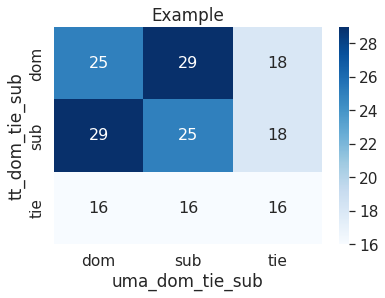

In [68]:
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(tt_and_uma_confusion, annot=True, annot_kws={"size": 16}, cmap="Blues") # font size
plt.title("Example")
plt.show()

In [69]:
dom_tie_sub_col = [col for col in exploded_pairwise_and_final_elo_score_df if "dom_tie_sub" in col]

In [70]:
dom_tie_sub_col

['uma_dom_tie_sub', 'hco_dom_tie_sub', 'tt_dom_tie_sub', 'rc_dom_tie_sub']

In [71]:
acronym_to_assay = {"tt": "Tube Test", "hco": "Home Cage", "uma": "Urine Marking", "rc": "Reward Competition"}

In [72]:
"abs" < "zyx"

True

hco_dom_tie_sub
uma_dom_tie_sub


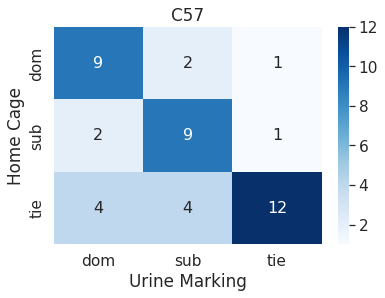

hco_dom_tie_sub
uma_dom_tie_sub


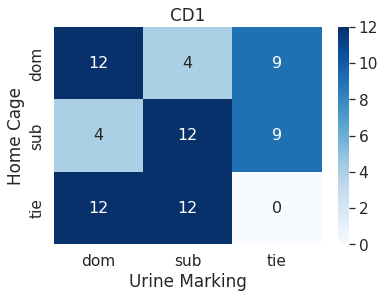

tt_dom_tie_sub
uma_dom_tie_sub


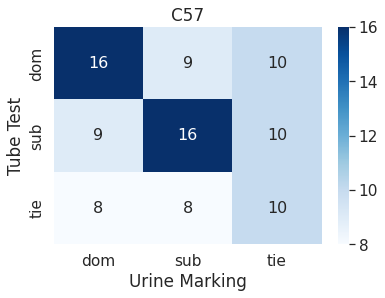

tt_dom_tie_sub
uma_dom_tie_sub


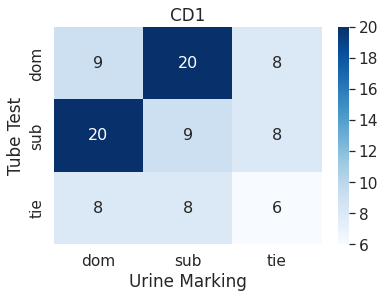

rc_dom_tie_sub
uma_dom_tie_sub


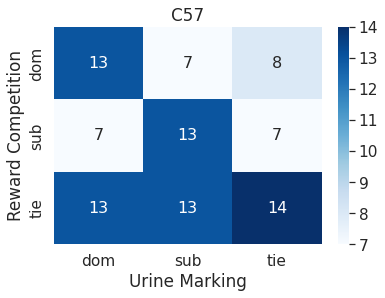

rc_dom_tie_sub
uma_dom_tie_sub


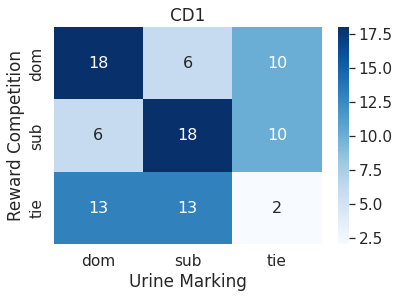

hco_dom_tie_sub
uma_dom_tie_sub


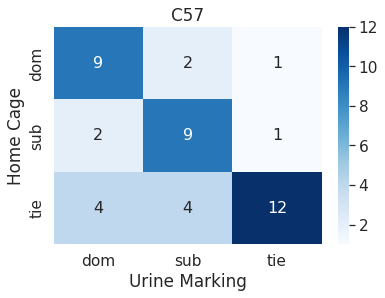

hco_dom_tie_sub
uma_dom_tie_sub


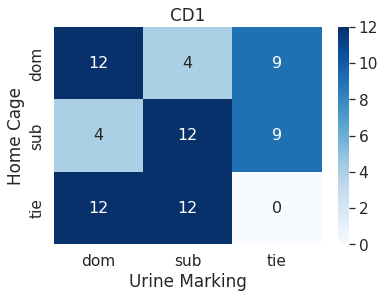

hco_dom_tie_sub
tt_dom_tie_sub


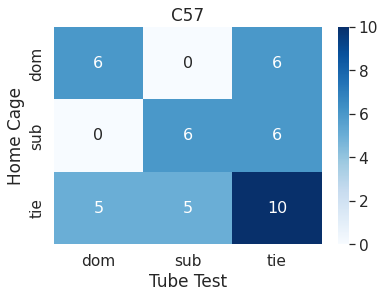

hco_dom_tie_sub
tt_dom_tie_sub


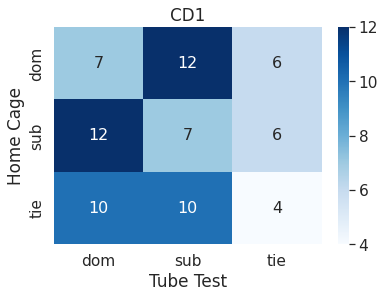

hco_dom_tie_sub
rc_dom_tie_sub


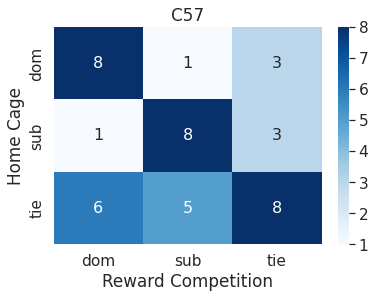

hco_dom_tie_sub
rc_dom_tie_sub


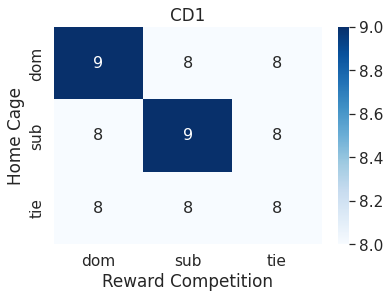

tt_dom_tie_sub
uma_dom_tie_sub


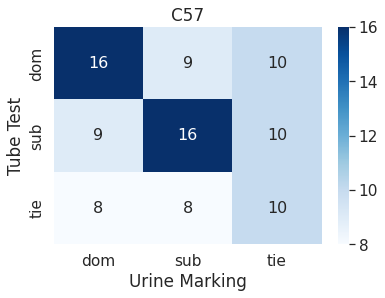

tt_dom_tie_sub
uma_dom_tie_sub


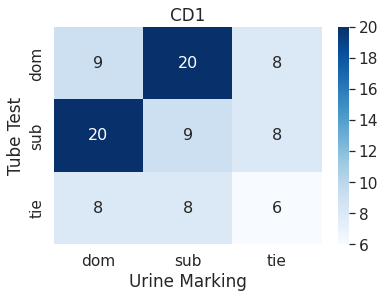

hco_dom_tie_sub
tt_dom_tie_sub


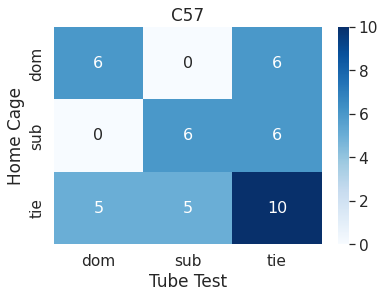

hco_dom_tie_sub
tt_dom_tie_sub


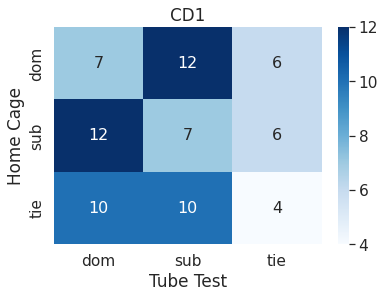

rc_dom_tie_sub
tt_dom_tie_sub


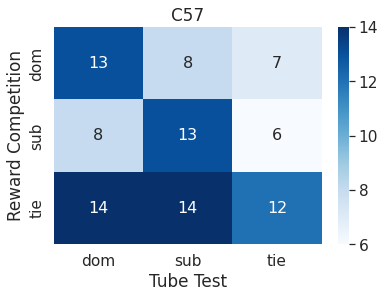

rc_dom_tie_sub
tt_dom_tie_sub


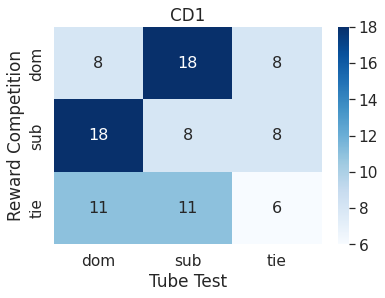

rc_dom_tie_sub
uma_dom_tie_sub


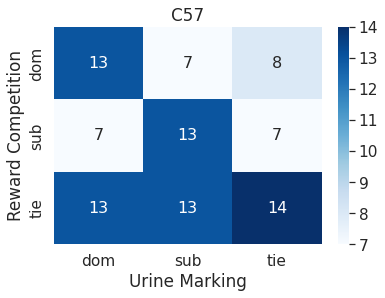

rc_dom_tie_sub
uma_dom_tie_sub


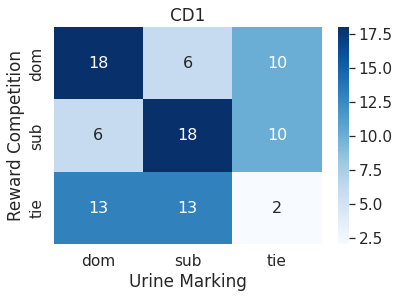

hco_dom_tie_sub
rc_dom_tie_sub


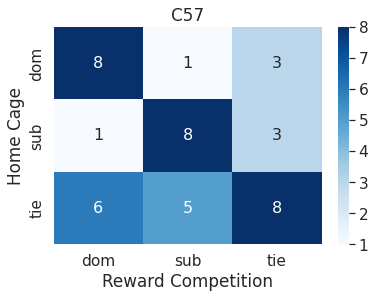

hco_dom_tie_sub
rc_dom_tie_sub


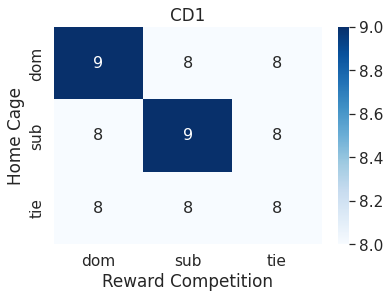

rc_dom_tie_sub
tt_dom_tie_sub


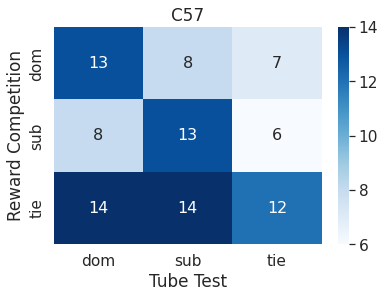

rc_dom_tie_sub
tt_dom_tie_sub


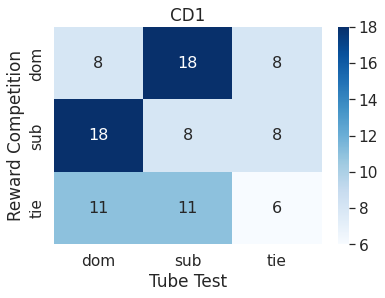

In [73]:
for assay_1, assay_2, strain in itertools.product(dom_tie_sub_col, dom_tie_sub_col, pairwise_and_final_elo_score_df["strain"].unique()):
    if assay_1 == assay_2:
        continue
    if assay_1 > assay_2:
        assay_1, assay_2 = assay_2, assay_1
    print(assay_1)
    print(assay_2)
    strain_df = exploded_pairwise_and_final_elo_score_df[exploded_pairwise_and_final_elo_score_df["strain"] == strain]
    pair_assay_confusion = pd.crosstab(strain_df[assay_1], strain_df[assay_2])
    pair_assay_confusion = pair_assay_confusion.reindex(["dom", "sub", "tie"])

    # plt.figure(figsize=(10,7))
    sn.set(font_scale=1.4) # for label size
    sn.heatmap(pair_assay_confusion, annot=True, annot_kws={"size": 16}, cmap="Blues") # font size
    plt.title("{}".format(strain))
#     plt.xlabel()
    acronym_1 = assay_1.split("_")[0]
    acronym_2 = assay_2.split("_")[0]

    plt.ylabel(acronym_to_assay[acronym_1])
    plt.xlabel(acronym_to_assay[acronym_2])
    plt.savefig("./proc/pairwise_plots/{}_{}_{}_pairwise_punnet.svg".format(strain, acronym_1, acronym_2))
    plt.show()

In [74]:
pair_assay_confusion[["dom", "sub"]].loc[["dom", "sub"]]

tt_dom_tie_sub,dom,sub
rc_dom_tie_sub,,
dom,8,18
sub,18,8


hco_dom_tie_sub
uma_dom_tie_sub


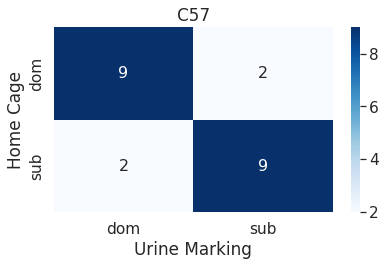

hco_dom_tie_sub
uma_dom_tie_sub


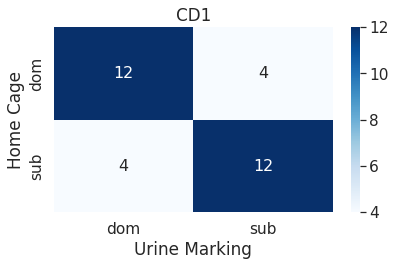

tt_dom_tie_sub
uma_dom_tie_sub


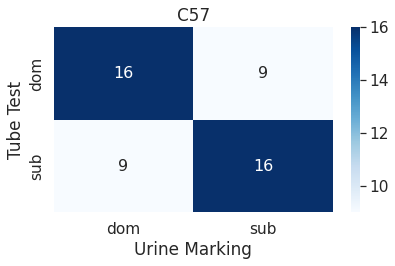

tt_dom_tie_sub
uma_dom_tie_sub


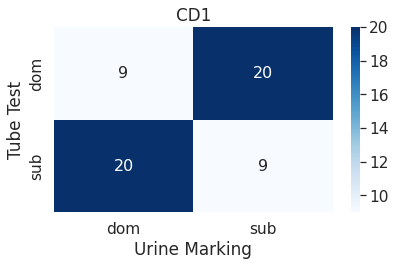

rc_dom_tie_sub
uma_dom_tie_sub


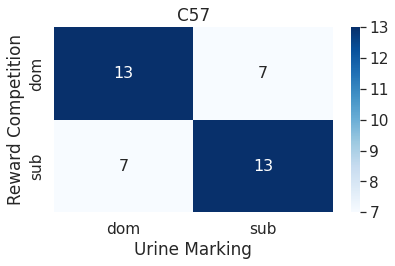

rc_dom_tie_sub
uma_dom_tie_sub


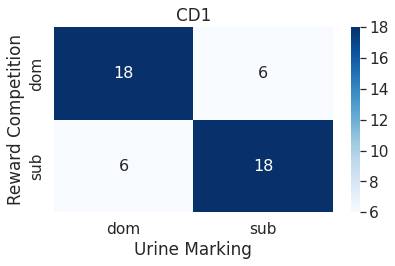

hco_dom_tie_sub
uma_dom_tie_sub


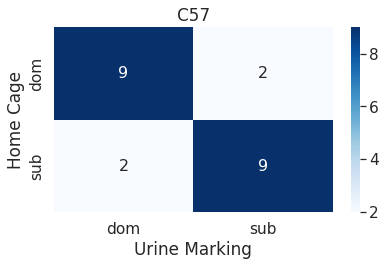

hco_dom_tie_sub
uma_dom_tie_sub


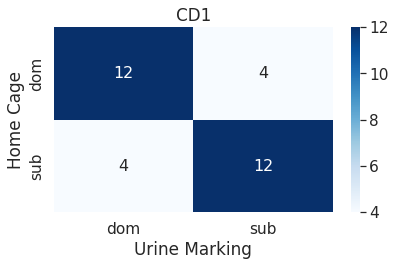

hco_dom_tie_sub
tt_dom_tie_sub


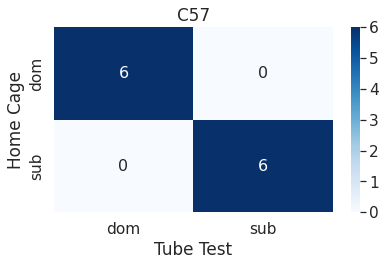

hco_dom_tie_sub
tt_dom_tie_sub


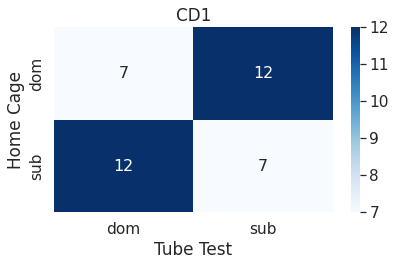

hco_dom_tie_sub
rc_dom_tie_sub


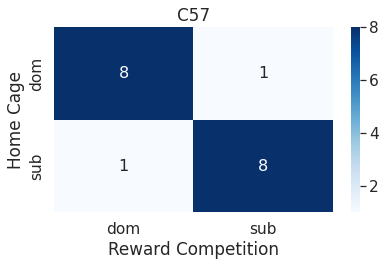

hco_dom_tie_sub
rc_dom_tie_sub


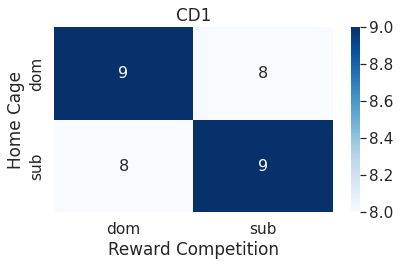

tt_dom_tie_sub
uma_dom_tie_sub


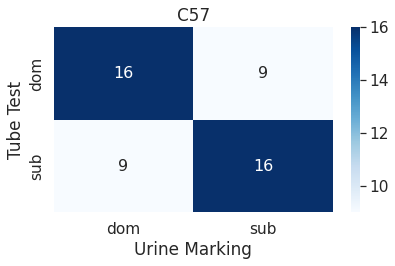

tt_dom_tie_sub
uma_dom_tie_sub


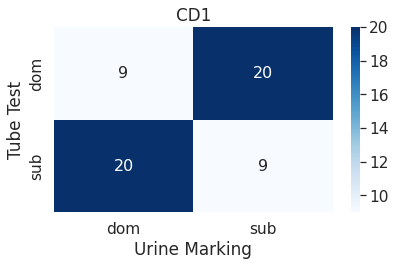

hco_dom_tie_sub
tt_dom_tie_sub


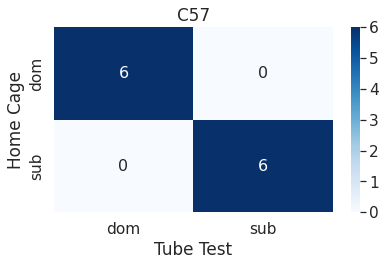

hco_dom_tie_sub
tt_dom_tie_sub


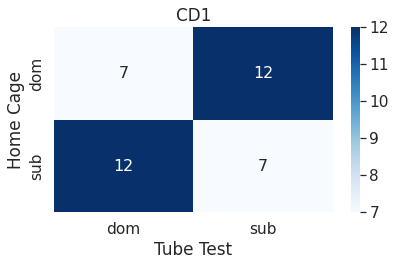

rc_dom_tie_sub
tt_dom_tie_sub


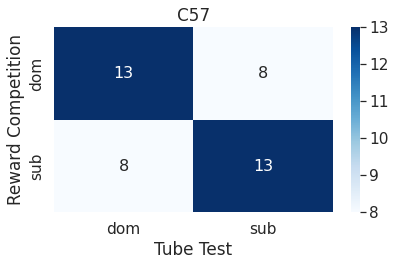

rc_dom_tie_sub
tt_dom_tie_sub


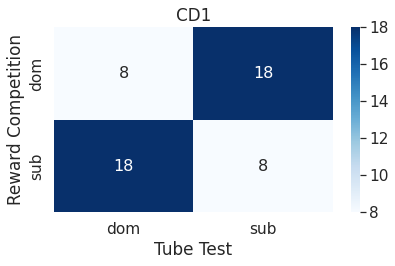

rc_dom_tie_sub
uma_dom_tie_sub


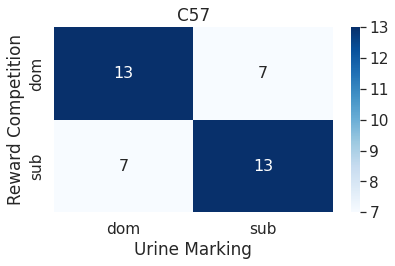

rc_dom_tie_sub
uma_dom_tie_sub


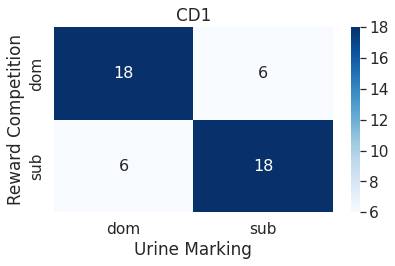

hco_dom_tie_sub
rc_dom_tie_sub


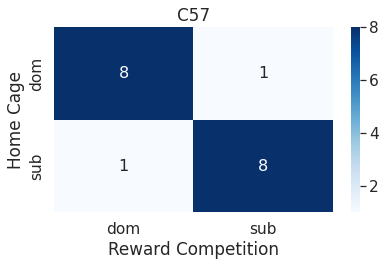

hco_dom_tie_sub
rc_dom_tie_sub


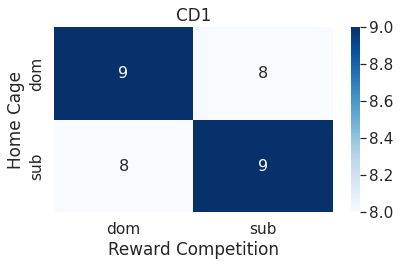

rc_dom_tie_sub
tt_dom_tie_sub


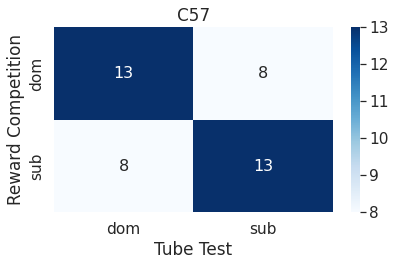

rc_dom_tie_sub
tt_dom_tie_sub


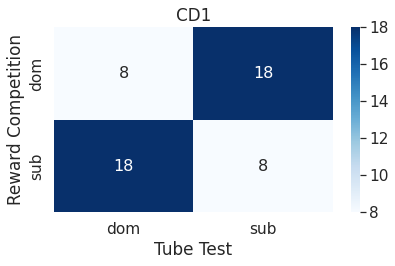

In [75]:
for assay_1, assay_2, strain in itertools.product(dom_tie_sub_col, dom_tie_sub_col, pairwise_and_final_elo_score_df["strain"].unique()):
    if assay_1 == assay_2:
        continue
    if assay_1 > assay_2:
        assay_1, assay_2 = assay_2, assay_1
    print(assay_1)
    print(assay_2)
    strain_df = exploded_pairwise_and_final_elo_score_df[exploded_pairwise_and_final_elo_score_df["strain"] == strain]
    pair_assay_confusion = pd.crosstab(strain_df[assay_1], strain_df[assay_2])
    pair_assay_confusion = pair_assay_confusion[["dom", "sub"]].loc[["dom", "sub"]]
    pair_assay_confusion = pair_assay_confusion.reindex(["dom", "sub"])

    # plt.figure(figsize=(10,7))
    sn.set(font_scale=1.4) # for label size
    sn.heatmap(pair_assay_confusion, annot=True, annot_kws={"size": 16}, cmap="Blues") # font size
    plt.title("{}".format(strain))
#     plt.xlabel()
    acronym_1 = assay_1.split("_")[0]
    acronym_2 = assay_2.split("_")[0]

    plt.ylabel(acronym_to_assay[acronym_1])
    plt.xlabel(acronym_to_assay[acronym_2])
    plt.tight_layout() 
    plt.savefig("./proc/pairwise_plots/{}_{}_{}_pairwise_punnet.svg".format(strain, acronym_1, acronym_2))
    
    plt.show()

In [76]:
pair_assay_confusion

tt_dom_tie_sub,dom,sub
rc_dom_tie_sub,,
dom,8,18
sub,18,8


hco_dom_tie_sub
uma_dom_tie_sub


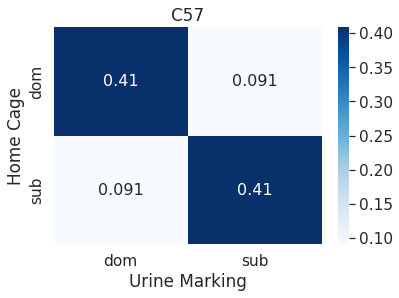

hco_dom_tie_sub
uma_dom_tie_sub


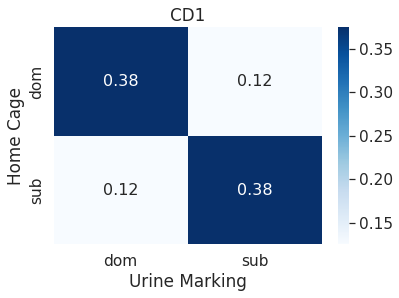

tt_dom_tie_sub
uma_dom_tie_sub


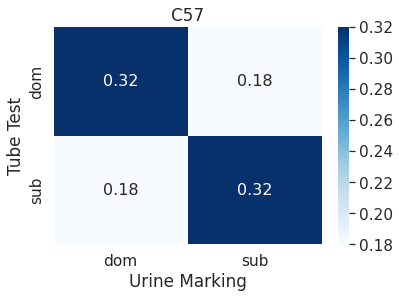

tt_dom_tie_sub
uma_dom_tie_sub


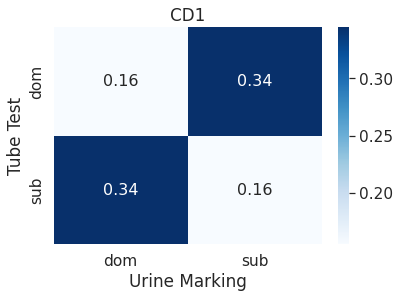

rc_dom_tie_sub
uma_dom_tie_sub


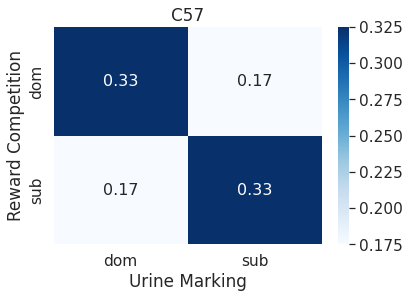

rc_dom_tie_sub
uma_dom_tie_sub


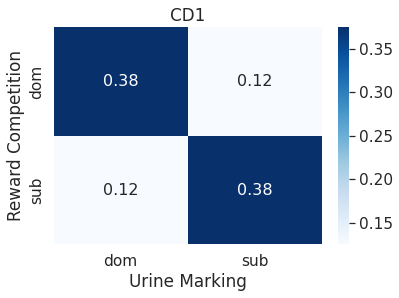

hco_dom_tie_sub
uma_dom_tie_sub


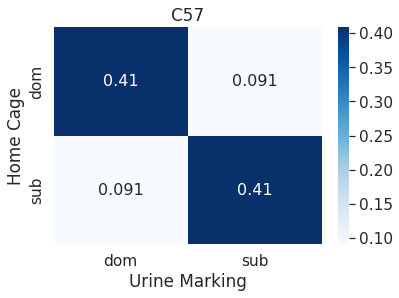

hco_dom_tie_sub
uma_dom_tie_sub


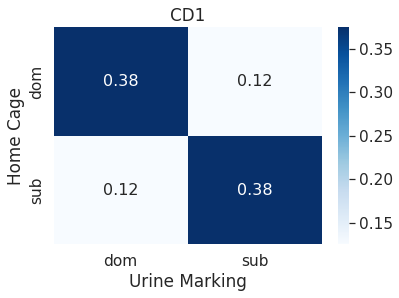

hco_dom_tie_sub
tt_dom_tie_sub


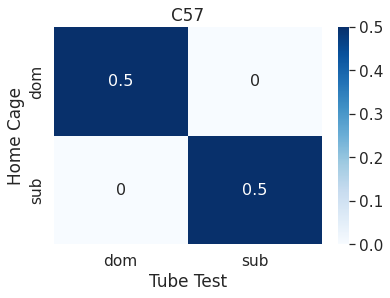

hco_dom_tie_sub
tt_dom_tie_sub


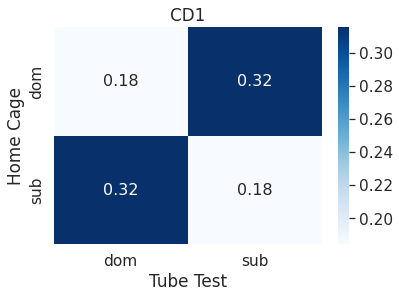

hco_dom_tie_sub
rc_dom_tie_sub


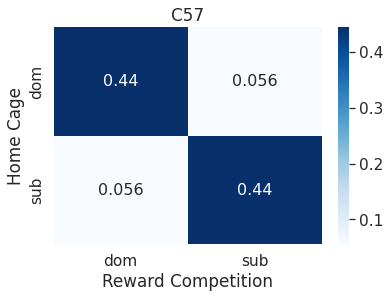

hco_dom_tie_sub
rc_dom_tie_sub


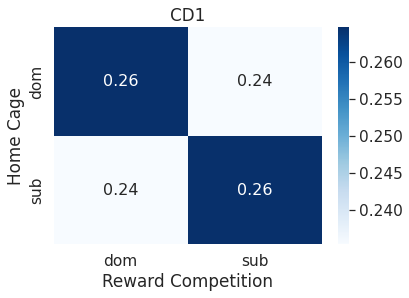

tt_dom_tie_sub
uma_dom_tie_sub


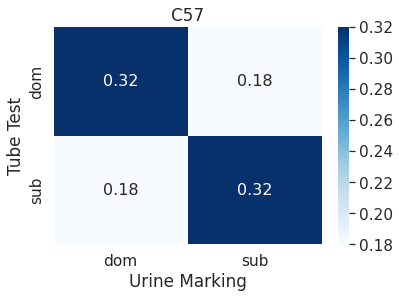

tt_dom_tie_sub
uma_dom_tie_sub


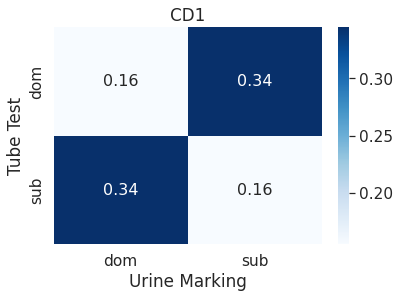

hco_dom_tie_sub
tt_dom_tie_sub


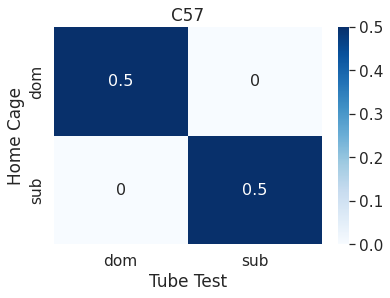

hco_dom_tie_sub
tt_dom_tie_sub


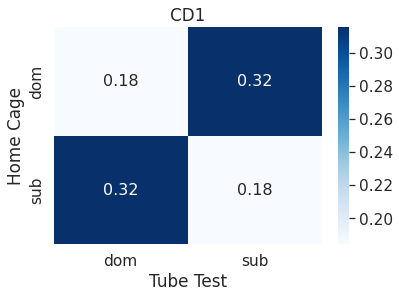

rc_dom_tie_sub
tt_dom_tie_sub


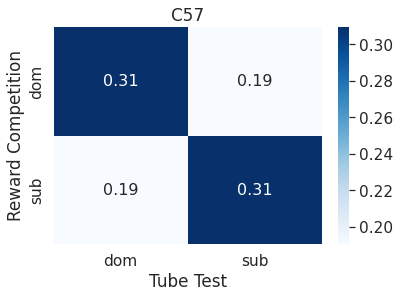

rc_dom_tie_sub
tt_dom_tie_sub


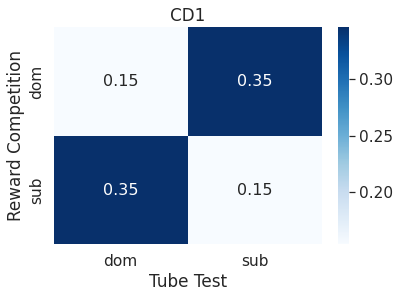

rc_dom_tie_sub
uma_dom_tie_sub


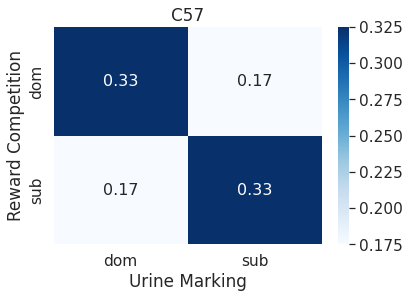

rc_dom_tie_sub
uma_dom_tie_sub


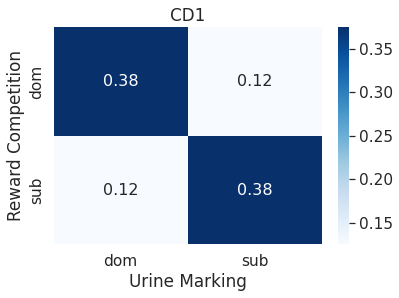

hco_dom_tie_sub
rc_dom_tie_sub


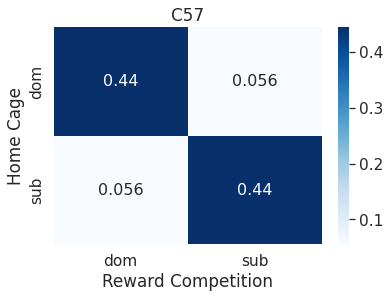

hco_dom_tie_sub
rc_dom_tie_sub


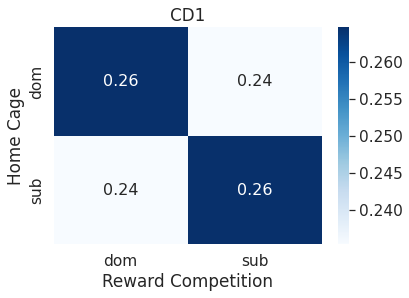

rc_dom_tie_sub
tt_dom_tie_sub


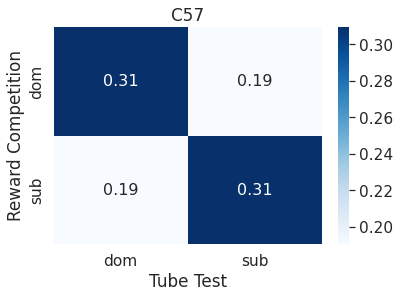

rc_dom_tie_sub
tt_dom_tie_sub


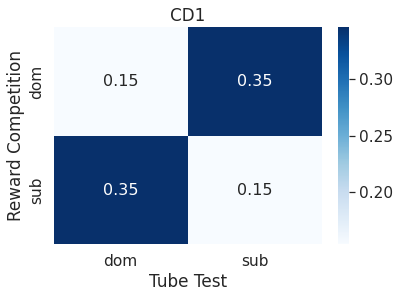

In [77]:
for assay_1, assay_2, strain in itertools.product(dom_tie_sub_col, dom_tie_sub_col, pairwise_and_final_elo_score_df["strain"].unique()):
    if assay_1 == assay_2:
        continue
    if assay_1 > assay_2:
        assay_1, assay_2 = assay_2, assay_1
    print(assay_1)
    print(assay_2)
    strain_df = exploded_pairwise_and_final_elo_score_df[exploded_pairwise_and_final_elo_score_df["strain"] == strain]
    pair_assay_confusion = pd.crosstab(strain_df[assay_1], strain_df[assay_2])
    pair_assay_confusion = pair_assay_confusion[["dom", "sub"]].loc[["dom", "sub"]]
    pair_assay_confusion = pair_assay_confusion / pair_assay_confusion.to_numpy().sum()
    pair_assay_confusion = pair_assay_confusion.reindex(["dom", "sub"])

    # plt.figure(figsize=(10,7))
    sn.set(font_scale=1.4) # for label size
    sn.heatmap(pair_assay_confusion, annot=True, annot_kws={"size": 16}, cmap="Blues") # font size
    plt.title("{}".format(strain))
#     plt.xlabel()
    acronym_1 = assay_1.split("_")[0]
    acronym_2 = assay_2.split("_")[0]

    plt.ylabel(acronym_to_assay[acronym_1])
    plt.xlabel(acronym_to_assay[acronym_2])
    plt.savefig("./proc/pairwise_plots/{}_{}_{}_pairwise_punnet_no_tie_and_proportion.svg".format(strain, acronym_1, acronym_2))
    plt.show()

## Reward Competition Winner vs Loser Disctribution

In [78]:
all_reward_comp_file_paths = glob.glob("./pilot*/**/*reward_competition_all_competition*.csv", recursive=True)

In [79]:
all_reward_comp_file_paths

['./pilot_1/proc/elo_score_spread_sheets/reward_competition_elo_score/cage_1_2_3_4_date_20220519_20220520/pilot_1_reward_competition_all_competition_cage_1_2_3_4_date_20220519_20220520.csv',
 './pilot_2/proc/elo_score_spread_sheets/reward_competition_elo_score/cage_1_2_3_4_5_6_date_20220728_20220729/pilot_2_reward_competition_all_competition_cage_1_2_3_4_5_6_date_20220728_20220729.csv',
 './pilot_3/proc/elo_score_spread_sheets/reward_competition_elo_score/cage_1_2_3_4_5_6_date_20221003_20221004/pilot_3_reward_competition_all_competition_cage_1_2_3_4_5_6_date_20221003_20221004.csv']

In [80]:
all_reward_comp_df = []
for file_path in all_reward_comp_file_paths:
    per_experiment_df = pd.read_csv(file_path, index_col=0)
    all_reward_comp_df.append(per_experiment_df)

In [81]:
combined_reward_comp_df = pd.concat(all_reward_comp_df)
combined_reward_comp_df = combined_reward_comp_df.reset_index(drop=True)

In [82]:
combined_reward_comp_df["rc_averaged_loser"] = combined_reward_comp_df["rc_averaged_loser"].astype(str)
combined_reward_comp_df["rc_averaged_winner"] = combined_reward_comp_df["rc_averaged_winner"].astype(str)

In [83]:
combined_reward_comp_df.head()

,rc_animal_ids,rc_date,rc_winner,rc_loser,rc_winner_no_ties,rc_loser_no_ties,rc_different_result_as_previous,rc_number_of_switches,cohort,processed_cage_number,...,rc_averaged_loser,rc_winner_count,rc_loser_count,rc_tie_count,rc_all_match_count_including_ties,rc_winner_count_minus_loser_count,rc_win_to_win_plus_lost_ratio,rc_win_to_all_ratio,rc_is_win_to_win_and_loss_ratio_tie,rc_tie_to_all_ratio
0,"('1.1', '1.2')",2022-05-19,"['1.1', '1.1', '1.1', '1.1', '1.2', '1.2', '1....","['1.2', '1.2', '1.2', '1.2', '1.1', '1.1', '1....","['1.1', '1.1', '1.1', '1.1', '1.2', '1.2', '1....","['1.2', '1.2', '1.2', '1.2', '1.1', '1.1', '1....","[False, False, False, True, False, True, True,...",8,pilot_1,1,...,1.2,11,9,0,20,2,0.550000,0.550000,True,0.000000
1,"('1.1', '1.2')",2022-05-20,"['1.1', 'tie', '1.2', 'tie', '1.2', 'tie', '1....","['1.2', 'tie', '1.1', 'tie', '1.1', 'tie', '1....","['1.1', '1.2', '1.2', '1.1', '1.1', '1.1', '1....","['1.2', '1.1', '1.1', '1.2', '1.2', '1.2', '1....","[True, False, True, False, False, True, False,...",4,pilot_1,1,...,1.2,5,4,10,19,1,0.555556,0.263158,True,0.526316
2,"('1.1', '1.3')",2022-05-19,"['1.3', 'tie', '1.3', '1.1', '1.1', '1.3', '1....","['1.1', 'tie', '1.1', '1.3', '1.3', '1.1', '1....","['1.3', '1.3', '1.1', '1.1', '1.3', '1.3', '1....","['1.1', '1.1', '1.3', '1.3', '1.1', '1.1', '1....","[False, True, False, True, False, False, True,...",6,pilot_1,1,...,1.1,13,4,2,19,9,0.764706,0.684211,False,0.105263
3,"('1.1', '1.3')",2022-05-20,"['1.1', 'tie', '1.3', '1.1', '1.1', '1.1', '1....","['1.3', 'tie', '1.1', '1.3', '1.3', '1.3', '1....","['1.1', '1.3', '1.1', '1.1', '1.1', '1.1', '1....","['1.3', '1.1', '1.3', '1.3', '1.3', '1.3', '1....","[True, True, False, False, False, False, False...",4,pilot_1,1,...,1.3,15,3,2,20,12,0.833333,0.750000,False,0.100000
4,"('1.1', '1.4')",2022-05-19,"['1.4', '1.1', '1.4', '1.4', '1.1', '1.4', '1....","['1.1', '1.4', '1.1', '1.1', '1.4', '1.1', '1....","['1.4', '1.1', '1.4', '1.4', '1.1', '1.4', '1....","['1.1', '1.4', '1.1', '1.1', '1.4', '1.1', '1....","[True, True, False, True, True, True, True, Fa...",9,pilot_1,1,...,1.1,13,7,0,20,6,0.650000,0.650000,False,0.000000


In [84]:
winner_merged_final_elo_score_df = merged_final_elo_score_df.copy()
loser_merged_final_elo_score_df = merged_final_elo_score_df.copy()

In [85]:
winner_merged_final_elo_score_df.columns = ["winner_{}".format(col) for col in winner_merged_final_elo_score_df.columns]
loser_merged_final_elo_score_df.columns = ["loser_{}".format(col) for col in loser_merged_final_elo_score_df.columns]

In [86]:
winner_merged_final_elo_score_df.head()

,winner_cohort,winner_subject_id,winner_home_cage_observation_final_elo_score,winner_home_cage_observation_rank,winner_reward_competition_final_elo_score,winner_reward_competition_rank,winner_tube_test_final_elo_score,winner_tube_test_rank,winner_urine_marking_final_elo_score,winner_urine_marking_rank
0,pilot_1,1.1,NaN,NaN,1165.8,1.0,1062.2,2.0,1010.3,2.0
1,pilot_1,1.2,NaN,NaN,1007.3,2.0,927.1,3.0,1000.8,3.0
2,pilot_1,1.3,NaN,NaN,900.9,4.0,775.7,4.0,972.0,4.0
3,pilot_1,1.4,NaN,NaN,926.0,3.0,1235.0,1.0,1016.9,1.0
4,pilot_1,2.1,NaN,NaN,1144.7,1.0,1122.6,2.0,1037.4,1.0


In [87]:
winner_merged_final_elo_score_df.groupby(['winner_subject_id', "winner_cohort"]).count()

winner_home_cage_observation_final_elo_score  \
winner_subject_id winner_cohort                                                 
1.1               pilot_1                                                   0   
                  pilot_2                                                   1   
                  pilot_3                                                   0   
1.2               pilot_1                                                   0   
                  pilot_2                                                   1   
...                                                                       ...   
6.2               pilot_3                                                   0   
6.3               pilot_2                                                   1   
                  pilot_3                                                   0   
6.4               pilot_2                                                   1   
                  pilot_3                                                   0   

                                 winner_home_cage_observation_rank  \
winner_subject_id winner_cohort                                      
1.1               pilot_1                                        0   
                  pilot_2                                        1   
                  pilot_3                                        0   
1.2               pilot_1                                        0   
                  pilot_2                                        1   
...                                                            ...   
6.2               pilot_3                                        0   
6.3               pilot_2                                        1   
                  pilot_3                                        0   
6.4               pilot_2                                        1   
                  pilot_3                                        0   

                                 winner_reward_competition_final_elo_score  \
winner_subject_id winner_cohort                                              
1.1               pilot_1                                                1   
                  pilot_2                                                1   
                  pilot_3                                                1   
1.2               pilot_1                                                1   
                  pilot_2                                                1   
...                                                                    ...   
6.2               pilot_3                                                1   
6.3               pilot_2                                                1   
                  pilot_3                                                1   
6.4               pilot_2                                                1   
                  pilot_3                                                1   

                                 winner_reward_competition_rank  \
winner_subject_id winner_cohort                                   
1.1               pilot_1                                     1   
                  pilot_2                                     1   
                  pilot_3                                     1   
1.2               pilot_1                                     1   
                  pilot_2                                     1   
...                                                         ...   
6.2               pilot_3                                     1   
6.3               pilot_2                                     1   
                  pilot_3                                     1   
6.4               pilot_2                                     1   
                  pilot_3                                     1   

                                 winner_tube_test_final_elo_score  \
winner_subject_id winner_cohort                                     
1.1               pilot_1                  

In [88]:
rc_all_competition_with_other_ranks_df = pd.merge(combined_reward_comp_df, winner_merged_final_elo_score_df,  how='left', left_on=['rc_averaged_winner','cohort'], right_on = ['winner_subject_id','winner_cohort'])
rc_all_competition_with_other_ranks_df = pd.merge(rc_all_competition_with_other_ranks_df, loser_merged_final_elo_score_df,  how='left', left_on=['rc_averaged_loser','cohort'], right_on = ['loser_subject_id','loser_cohort'])

In [89]:
rc_all_competition_with_other_ranks_df["rc_winner"] = rc_all_competition_with_other_ranks_df["rc_winner"].apply(lambda x: ast.literal_eval(x))
rc_all_competition_with_other_ranks_df["rc_loser"] = rc_all_competition_with_other_ranks_df["rc_loser"].apply(lambda x: ast.literal_eval(x))

In [90]:
rc_all_competition_with_other_ranks_df["list_of_animals"] = rc_all_competition_with_other_ranks_df["rc_animal_ids"].apply(lambda x: list(ast.literal_eval(x)))

In [91]:
rc_all_competition_with_other_ranks_df.tail()

,rc_animal_ids,rc_date,rc_winner,rc_loser,rc_winner_no_ties,rc_loser_no_ties,rc_different_result_as_previous,rc_number_of_switches,cohort,processed_cage_number,...,loser_subject_id,loser_home_cage_observation_final_elo_score,loser_home_cage_observation_rank,loser_reward_competition_final_elo_score,loser_reward_competition_rank,loser_tube_test_final_elo_score,loser_tube_test_rank,loser_urine_marking_final_elo_score,loser_urine_marking_rank,list_of_animals
186,"('6.2', '6.3')",2022-10-04,"[6.3, 6.2, 6.3, 6.3, 6.3, 6.3, 6.3, 6.3, 6.3, ...","[6.2, 6.3, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, ...","['6.3', '6.2', '6.3', '6.3', '6.3', '6.3', '6....","['6.2', '6.3', '6.2', '6.2', '6.2', '6.2', '6....","[True, True, False, False, False, False, False...",2,pilot_3,6,...,6.2,NaN,NaN,752.6,4.0,1021.2,2.0,980.6,3.0,"[6.2, 6.3]"
187,"('6.2', '6.4')",2022-10-03,"[6.4, 6.4, 6.2, 6.2, 6.4, 6.4, 6.4, 6.4, 6.4, ...","[6.2, 6.2, 6.4, 6.4, 6.2, 6.2, 6.2, 6.2, 6.2, ...","['6.4', '6.4', '6.2', '6.2', '6.4', '6.4', '6....","['6.2', '6.2', '6.4', '6.4', '6.2', '6.2', '6....","[False, True, False, True, False, False, False...",2,pilot_3,6,...,6.2,NaN,NaN,752.6,4.0,1021.2,2.0,980.6,3.0,"[6.2, 6.4]"
188,"('6.2', '6.4')",2022-10-04,"[6.4, 6.4, 6.2, 6.4, 6.4, 6.4, 6.4, 6.4, 6.4, ...","[6.2, 6.2, 6.4, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, ...","['6.4', '6.4', '6.2', '6.4', '6.4', '6.4', '6....","['6.2', '6.2', '6.4', '6.2', '6.2', '6.2', '6....","[False, True, True, False, False, False, False...",2,pilot_3,6,...,6.2,NaN,NaN,752.6,4.0,1021.2,2.0,980.6,3.0,"[6.2, 6.4]"
189,"('6.3', '6.4')",2022-10-03,"[6.3, 6.4, 6.4, 6.4, 6.3, 6.4, 6.3, 6.4, 6.3, ...","[6.4, 6.3, 6.3, 6.3, 6.4, 6.3, 6.4, 6.3, 6.4, ...","['6.3', '6.4', '6.4', '6.4', '6.3', '6.4', '6....","['6.4', '6.3', '6.3', '6.3', '6.4', '6.3', '6....","[True, False, False, True, True, True, True, T...",10,pilot_3,6,...,6.4,NaN,NaN,1021.0,2.0,834.5,4.0,1010.0,2.0,"[6.3, 6.4]"
190,"('6.3', '6.4')",2022-10-04,"[6.3, 6.3, 6.3, 6.3, 6.3, 6.3, 6.4, 6.3, 6.3, ...","[6.4, 6.4, 6.4, 6.4, 6.4, 6.4, 6.3, 6.4, 6.4, ...","['6.3', '6.3', '6.3', '6.3', '6.3', '6.3', '6....","['6.4', '6.4', '6.4', '6.4', '6.4', '6.4', '6....","[False, False, False, False, False, True, True...",4,pilot_3,6,...,6.4,NaN,NaN,1021.0,2.0,834.5,4.0,1010.0,2.0,"[6.3, 6.4]"


In [92]:
hco_rank_1_4_for_reward_comf_df = rc_all_competition_with_other_ranks_df[(rc_all_competition_with_other_ranks_df["winner_home_cage_observation_rank"].isin([1, 4])) & (rc_all_competition_with_other_ranks_df["loser_home_cage_observation_rank"].isin([1, 4]))]

In [93]:
tt_rank_1_4_for_reward_comf_df = rc_all_competition_with_other_ranks_df[(rc_all_competition_with_other_ranks_df["winner_tube_test_rank"].isin([1, 4])) & (rc_all_competition_with_other_ranks_df["loser_tube_test_rank"].isin([1, 4]))]

In [94]:
hco_rank_1_4_for_reward_comf_df[["winner_home_cage_observation_rank", "loser_home_cage_observation_rank"]]

,winner_home_cage_observation_rank,loser_home_cage_observation_rank
24,1.0,4.0
43,1.0,4.0
44,1.0,4.0
47,4.0,1.0
48,4.0,1.0
61,1.0,4.0
62,1.0,4.0
65,1.0,1.0
71,1.0,4.0
72,1.0,4.0


In [95]:
cd1_rank_to_rc_wins = {}

In [96]:
cd1_rank_to_rc_wins["tt_rank_1_wins"] = []
cd1_rank_to_rc_wins["tt_rank_4_wins"] = []
for index, row in tt_rank_1_4_for_reward_comf_df[tt_rank_1_4_for_reward_comf_df["strain"] == "CD1"].iterrows():
    if row["winner_tube_test_rank"] == 1:
        cd1_rank_to_rc_wins["tt_rank_1_wins"].append(row["rc_winner_count"])
        cd1_rank_to_rc_wins["tt_rank_4_wins"].append(row["rc_loser_count"])

    else:
        cd1_rank_to_rc_wins["tt_rank_4_wins"].append(row["rc_winner_count"])
        cd1_rank_to_rc_wins["tt_rank_1_wins"].append(row["rc_loser_count"])


In [97]:
cd1_rank_to_rc_wins["hco_rank_1_wins"] = []
cd1_rank_to_rc_wins["hco_rank_4_wins"] = []
for index, row in hco_rank_1_4_for_reward_comf_df[hco_rank_1_4_for_reward_comf_df["strain"] == "CD1"].iterrows():
    if row["winner_home_cage_observation_rank"] == 1:
        cd1_rank_to_rc_wins["hco_rank_1_wins"].append(row["rc_winner_count"])
        cd1_rank_to_rc_wins["hco_rank_4_wins"].append(row["rc_loser_count"])

    else:
        cd1_rank_to_rc_wins["hco_rank_4_wins"].append(row["rc_winner_count"])
        cd1_rank_to_rc_wins["hco_rank_1_wins"].append(row["rc_loser_count"])


In [98]:
c57_rank_to_rc_wins = {}

In [99]:
c57_rank_to_rc_wins["tt_rank_1_wins"] = []
c57_rank_to_rc_wins["tt_rank_4_wins"] = []
for index, row in tt_rank_1_4_for_reward_comf_df[tt_rank_1_4_for_reward_comf_df["strain"] == "C57"].iterrows():
    if row["winner_tube_test_rank"] == 1:
        c57_rank_to_rc_wins["tt_rank_1_wins"].append(row["rc_winner_count"])
        c57_rank_to_rc_wins["tt_rank_4_wins"].append(row["rc_loser_count"])

    else:
        c57_rank_to_rc_wins["tt_rank_4_wins"].append(row["rc_winner_count"])
        c57_rank_to_rc_wins["tt_rank_1_wins"].append(row["rc_loser_count"])


In [100]:
c57_rank_to_rc_wins["hco_rank_1_wins"] = []
c57_rank_to_rc_wins["hco_rank_4_wins"] = []
for index, row in hco_rank_1_4_for_reward_comf_df[hco_rank_1_4_for_reward_comf_df["strain"] == "C57"].iterrows():
    if row["winner_home_cage_observation_rank"] == 1:
        c57_rank_to_rc_wins["hco_rank_1_wins"].append(row["rc_winner_count"])
        c57_rank_to_rc_wins["hco_rank_4_wins"].append(row["rc_loser_count"])

    else:
        c57_rank_to_rc_wins["hco_rank_4_wins"].append(row["rc_winner_count"])
        c57_rank_to_rc_wins["hco_rank_1_wins"].append(row["rc_loser_count"])


In [101]:
# Increase size of plot in jupyter

plt.rcParams["figure.figsize"] = (12,5)

[Text(1, 0, 'tt_rank_1_wins'),
 Text(2, 0, 'tt_rank_4_wins'),
 Text(3, 0, 'hco_rank_1_wins'),
 Text(4, 0, 'hco_rank_4_wins')]

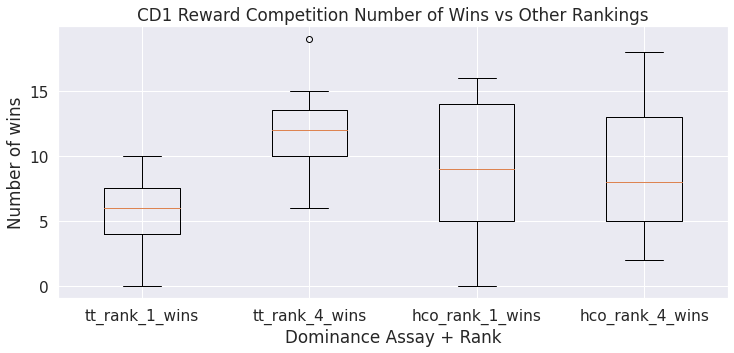

In [102]:
fig, ax = plt.subplots()
plt.title("CD1 Reward Competition Number of Wins vs Other Rankings")
plt.xlabel("Dominance Assay + Rank")
plt.ylabel("Number of wins")
ax.boxplot(cd1_rank_to_rc_wins.values())
ax.set_xticklabels(cd1_rank_to_rc_wins.keys())

[Text(1, 0, 'tt_rank_1_wins'),
 Text(2, 0, 'tt_rank_4_wins'),
 Text(3, 0, 'hco_rank_1_wins'),
 Text(4, 0, 'hco_rank_4_wins')]

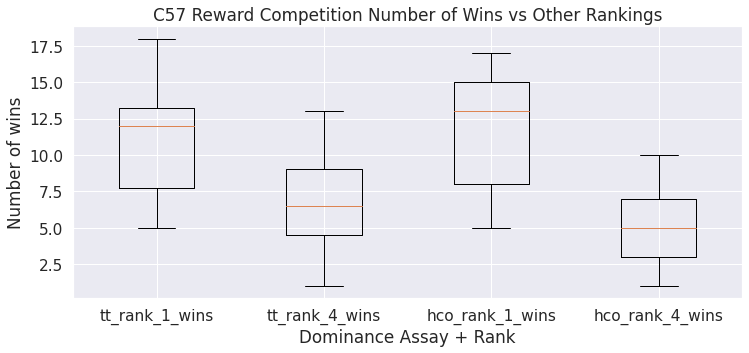

In [103]:
fig, ax = plt.subplots()
plt.title("C57 Reward Competition Number of Wins vs Other Rankings")
plt.xlabel("Dominance Assay + Rank")
plt.ylabel("Number of wins")
ax.boxplot(c57_rank_to_rc_wins.values())
ax.set_xticklabels(c57_rank_to_rc_wins.keys())

In [104]:
cd1_rank_to_rc_wins

{'tt_rank_1_wins': [6, 10, 7, 5, 9, 6, 4, 8, 4, 6, 0, 2, 6, 9, 4],
 'tt_rank_4_wins': [14, 9, 12, 12, 6, 13, 7, 11, 11, 11, 19, 15, 12, 9, 14],
 'hco_rank_1_wins': [14, 15, 15, 10, 6, 4, 6, 9, 16, 5, 14, 1, 0],
 'hco_rank_4_wins': [6, 4, 3, 5, 12, 8, 13, 8, 2, 14, 5, 18, 18]}

In [105]:
c57_rank_to_rc_wins

{'tt_rank_1_wins': [9, 11, 7, 13, 18, 16, 8, 5, 13, 14, 5, 6, 10, 15, 13, 13],
 'tt_rank_4_wins': [11, 8, 13, 6, 1, 3, 8, 13, 3, 5, 9, 9, 7, 3, 5, 6],
 'hco_rank_1_wins': [8, 5, 16, 17, 8, 13, 14, 10, 15],
 'hco_rank_4_wins': [10, 6, 2, 1, 8, 3, 5, 7, 3]}

In [106]:
pd.concat({k: pd.Series(v) for k, v in cd1_rank_to_rc_wins.items()}, axis=1).to_csv("./proc/cd1_rank_to_rc_wins")

In [107]:
pd.concat({k: pd.Series(v) for k, v in c57_rank_to_rc_wins.items()}, axis=1).to_csv("./proc/c57_rank_to_rc_wins")

# Looking at reward competition per day

In [108]:
rc_trial_as_column_paths = glob.glob("./**/*reward_competition_trial*.csv", recursive=True)

In [109]:
rc_trial_as_column_paths

['./pilot_1/proc/elo_score_spread_sheets/reward_competition_elo_score/pilot_1_reward_competition_trial_as_columns_cages_1_2_3_4_date_20220519_20220520.csv',
 './pilot_2/proc/elo_score_spread_sheets/reward_competition_elo_score/pilot_2_reward_competition_trial_as_columns_cages_1_2_3_4_5_6_date_20220728_20220729.csv',
 './pilot_3/proc/elo_score_spread_sheets/reward_competition_elo_score/pilot_3_reward_competition_trial_as_columns_cages_1_2_3_4_5_6_date_20221003_20221004.csv']

- Combining all the reward competition dataframes from each pilot

In [110]:
all_rc_trial_as_column_df = []
for file_path in rc_trial_as_column_paths:
    all_rc_trial_as_column_df.append(pd.read_csv(file_path, index_col=0))

In [111]:
combined_rc_trial_as_column_df = pd.concat(all_rc_trial_as_column_df)
combined_rc_trial_as_column_df = combined_rc_trial_as_column_df.reset_index(drop=True)
combined_rc_trial_as_column_df = combined_rc_trial_as_column_df.dropna(axis=1)
# Making this column into a tuple
combined_rc_trial_as_column_df["animal_ids"] = combined_rc_trial_as_column_df["animal_ids"].apply(lambda x: tuple(sorted(ast.literal_eval(x))))


- Creating a column for each animal ID so that we can merge based on the animal's ID

In [112]:
combined_rc_trial_as_column_df["first_animal_id"] = combined_rc_trial_as_column_df["animal_ids"].apply(lambda x: x[0])
combined_rc_trial_as_column_df["second_animal_id"] = combined_rc_trial_as_column_df["animal_ids"].apply(lambda x: x[1])

In [113]:
combined_rc_trial_as_column_df.head()

,date,cage,box,match,trial 1 winner,trial 2 winner,trial 3 winner,trial 4 winner,trial 5 winner,trial 6 winner,...,trial 15 winner,trial 16 winner,trial 17 winner,trial 18 winner,trial 19 winner,animal_ids,cohort,strain,first_animal_id,second_animal_id
0,2022-05-19,1,1.0,1.1 v 1.2,1.1,1.1,1.1,1.1,1.2,1.2,...,1.2,1.2,1.1,1.2,1.1,"(1.1, 1.2)",pilot_1,C57,1.1,1.2
1,2022-05-19,1,2.0,1.3 v 1.4,1.4,1.4,1.3,1.3,1.4,1.4,...,1.4,1.4,1.4,1.4,1.3,"(1.3, 1.4)",pilot_1,C57,1.3,1.4
2,2022-05-19,1,3.0,1.1 v 1.3,1.3,tie,1.3,1.1,1.1,1.3,...,1.3,1.3,1.3,1.3,1.3,"(1.1, 1.3)",pilot_1,C57,1.1,1.3
3,2022-05-19,1,4.0,1.2 v 1.4,1.4,1.2,1.2,1.2,1.4,1.4,...,1.4,1.2,1.2,1.4,1.4,"(1.2, 1.4)",pilot_1,C57,1.2,1.4
4,2022-05-19,1,2.0,1.2 v 1.3,1.2,1.3,1.3,1.3,1.2,1.3,...,1.2,1.2,1.3,1.2,1.2,"(1.2, 1.3)",pilot_1,C57,1.2,1.3


In [114]:
combined_rc_trial_as_column_df.columns

Index(['date', 'cage', 'box', 'match', 'trial 1 winner', 'trial 2 winner',
       'trial 3 winner', 'trial 4 winner', 'trial 5 winner', 'trial 6 winner',
       'trial 7 winner', 'trial 8 winner', 'trial 9 winner', 'trial 10 winner',
       'trial 11 winner', 'trial 12 winner', 'trial 13 winner',
       'trial 14 winner', 'trial 15 winner', 'trial 16 winner',
       'trial 17 winner', 'trial 18 winner', 'trial 19 winner', 'animal_ids',
       'cohort', 'strain', 'first_animal_id', 'second_animal_id'],
      dtype='object')

- Combining all trial columns into one for overall statistics

In [115]:
trial_columns = [col for col in combined_rc_trial_as_column_df.columns if "trial" in col]

In [116]:
trial_columns

['trial 1 winner',
 'trial 2 winner',
 'trial 3 winner',
 'trial 4 winner',
 'trial 5 winner',
 'trial 6 winner',
 'trial 7 winner',
 'trial 8 winner',
 'trial 9 winner',
 'trial 10 winner',
 'trial 11 winner',
 'trial 12 winner',
 'trial 13 winner',
 'trial 14 winner',
 'trial 15 winner',
 'trial 16 winner',
 'trial 17 winner',
 'trial 18 winner',
 'trial 19 winner']

- All the trials including ties

In [117]:
combined_rc_trial_as_column_df['all_trials_combined_with_ties'] = combined_rc_trial_as_column_df[trial_columns].apply(lambda x: list(x), axis=1)

- All the trials not including ties

In [118]:
combined_rc_trial_as_column_df['all_trials_combined_with_no_ties'] = combined_rc_trial_as_column_df.apply(lambda x: [trial for trial in x["all_trials_combined_with_ties"] if trial in x["animal_ids"]], axis=1)

- Making a column as 0 or 1 if the first/second animal wins tht round

In [119]:
combined_rc_trial_as_column_df["first_win_trials_no_ties"] = combined_rc_trial_as_column_df.apply(lambda x: [1 if x["first_animal_id"] == win else 0 for win in x['all_trials_combined_with_no_ties']], axis=1)
combined_rc_trial_as_column_df["second_win_trials_no_ties"] = combined_rc_trial_as_column_df.apply(lambda x: [1 if x["second_animal_id"] == win else 0 for win in x['all_trials_combined_with_no_ties']], axis=1)

In [120]:
combined_rc_trial_as_column_df.head()

,date,cage,box,match,trial 1 winner,trial 2 winner,trial 3 winner,trial 4 winner,trial 5 winner,trial 6 winner,...,trial 19 winner,animal_ids,cohort,strain,first_animal_id,second_animal_id,all_trials_combined_with_ties,all_trials_combined_with_no_ties,first_win_trials_no_ties,second_win_trials_no_ties
0,2022-05-19,1,1.0,1.1 v 1.2,1.1,1.1,1.1,1.1,1.2,1.2,...,1.1,"(1.1, 1.2)",pilot_1,C57,1.1,1.2,"[1.1, 1.1, 1.1, 1.1, 1.2, 1.2, 1.1, 1.2, 1.1, ...","[1.1, 1.1, 1.1, 1.1, 1.2, 1.2, 1.1, 1.2, 1.1, ...","[1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, ..."
1,2022-05-19,1,2.0,1.3 v 1.4,1.4,1.4,1.3,1.3,1.4,1.4,...,1.3,"(1.3, 1.4)",pilot_1,C57,1.3,1.4,"[1.4, 1.4, 1.3, 1.3, 1.4, 1.4, 1.4, 1.3, 1.3, ...","[1.4, 1.4, 1.3, 1.3, 1.4, 1.4, 1.4, 1.3, 1.3, ...","[0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, ...","[1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, ..."
2,2022-05-19,1,3.0,1.1 v 1.3,1.3,tie,1.3,1.1,1.1,1.3,...,1.3,"(1.1, 1.3)",pilot_1,C57,1.1,1.3,"[1.3, tie, 1.3, 1.1, 1.1, 1.3, 1.3, tie, 1.3, ...","[1.3, 1.3, 1.1, 1.1, 1.3, 1.3, 1.3, 1.1, 1.3, ...","[0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, ...","[1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, ..."
3,2022-05-19,1,4.0,1.2 v 1.4,1.4,1.2,1.2,1.2,1.4,1.4,...,1.4,"(1.2, 1.4)",pilot_1,C57,1.2,1.4,"[1.4, 1.2, 1.2, 1.2, 1.4, 1.4, 1.2, 1.2, 1.4, ...","[1.4, 1.2, 1.2, 1.2, 1.4, 1.4, 1.2, 1.2, 1.4, ...","[0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, ...","[1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, ..."
4,2022-05-19,1,2.0,1.2 v 1.3,1.2,1.3,1.3,1.3,1.2,1.3,...,1.2,"(1.2, 1.3)",pilot_1,C57,1.2,1.3,"[1.2, 1.3, 1.3, 1.3, 1.2, 1.3, 1.3, 1.3, 1.2, ...","[1.2, 1.3, 1.3, 1.3, 1.2, 1.3, 1.3, 1.3, 1.2, ...","[1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, ...","[0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, ..."


- Counting the number of wins

In [121]:
combined_rc_trial_as_column_df["first_win_count"] = combined_rc_trial_as_column_df.apply(lambda x: sum(x["first_win_trials_no_ties"]), axis=1)
combined_rc_trial_as_column_df["second_win_count"] = combined_rc_trial_as_column_df.apply(lambda x: sum(x["second_win_trials_no_ties"]), axis=1)


- Counting the number of wins and losses(not including the ties)

In [122]:
combined_rc_trial_as_column_df["win_and_loss_count"] = combined_rc_trial_as_column_df.apply(lambda x: len(x["first_win_trials_no_ties"]), axis=1)


- Getting the proportions of wins vs wins + losses

In [123]:

combined_rc_trial_as_column_df["first_win_proportion_no_ties"] = combined_rc_trial_as_column_df.apply(lambda x: x["first_win_count"] / x["win_and_loss_count"], axis=1)
combined_rc_trial_as_column_df["second_win_proportion_no_ties"] = combined_rc_trial_as_column_df.apply(lambda x: x["second_win_count"] / x["win_and_loss_count"], axis=1)


- Classifying the mouse as dom/sub/tie based on if the winner has 60% or more

In [124]:
combined_rc_trial_as_column_df["first_dom_sub_or_tie"] = combined_rc_trial_as_column_df.apply(lambda x: "dom" if x["first_win_proportion_no_ties"] >= 0.6 else ("sub" if x["second_win_proportion_no_ties"] >= 0.6 else "tie"), axis=1)
combined_rc_trial_as_column_df["second_dom_sub_or_tie"] = combined_rc_trial_as_column_df.apply(lambda x: "dom" if x["second_win_proportion_no_ties"] >= 0.6 else ("sub" if x["first_win_proportion_no_ties"] >= 0.6 else "tie"), axis=1)

- Removing all the rows with ties for reward comp

In [125]:
combined_rc_trial_as_column_df = combined_rc_trial_as_column_df[combined_rc_trial_as_column_df["first_dom_sub_or_tie"] != "tie"]

- Renaming to columns to numbers
    - Uncomment if using

- Splitting the rows into first and second subject

In [126]:
combined_rc_trial_as_column_df["animal_ids"]

2      (1.1, 1.3)
5      (1.1, 1.4)
6      (1.1, 1.4)
7      (1.2, 1.3)
8      (1.1, 1.3)
          ...    
187    (3.1, 3.2)
188    (2.3, 2.4)
189    (2.1, 2.2)
190    (1.3, 1.4)
191    (1.1, 1.2)
Name: animal_ids, Length: 144, dtype: object

In [127]:
combined_rc_trial_as_column_df["animal_ids_list"] = combined_rc_trial_as_column_df["animal_ids"].apply(lambda x: sorted(list(x)))

In [128]:
exploded_combined_rc_trial_as_column_df = combined_rc_trial_as_column_df.explode("animal_ids")

In [129]:
exploded_combined_rc_trial_as_column_df = exploded_combined_rc_trial_as_column_df.rename(columns={"animal_ids": "subject_animal_id"})

In [130]:
exploded_combined_rc_trial_as_column_df["subject_index"] = exploded_combined_rc_trial_as_column_df.apply(lambda x: x["animal_ids_list"].index(x["subject_animal_id"]), axis=1)

In [131]:
exploded_combined_rc_trial_as_column_df["agent_index"] = exploded_combined_rc_trial_as_column_df["subject_index"].apply(lambda x: list(set([0, 1]) - set([x]))[0])

In [132]:
exploded_combined_rc_trial_as_column_df["agent_animal_id"] = exploded_combined_rc_trial_as_column_df.apply(lambda x: x["animal_ids_list"][x["agent_index"]], axis=1)

In [133]:
exploded_combined_rc_trial_as_column_df[["subject_index", "subject_animal_id", "animal_ids_list", "agent_index", "agent_animal_id"]].head()

,subject_index,subject_animal_id,animal_ids_list,agent_index,agent_animal_id
2,0,1.1,"[1.1, 1.3]",1,1.3
2,1,1.3,"[1.1, 1.3]",0,1.1
5,0,1.1,"[1.1, 1.4]",1,1.4
5,1,1.4,"[1.1, 1.4]",0,1.1
6,0,1.1,"[1.1, 1.4]",1,1.4


- Merging the ranking dataframe based on the first and second animal ID + cohort

In [134]:
subject_merged_final_elo_score_df = merged_final_elo_score_df.copy()
agent_merged_final_elo_score_df = merged_final_elo_score_df.copy()

In [135]:
subject_merged_final_elo_score_df.columns = ["subject_{}".format(col) for col in subject_merged_final_elo_score_df.columns]
agent_merged_final_elo_score_df.columns = ["agent_{}".format(col) for col in agent_merged_final_elo_score_df.columns]

In [136]:
combined_rc_trial_as_column_with_other_ranks_df = pd.merge(exploded_combined_rc_trial_as_column_df, subject_merged_final_elo_score_df,  how='left', left_on=['subject_animal_id','cohort'], right_on = ['subject_subject_id','subject_cohort'])
combined_rc_trial_as_column_with_other_ranks_df = pd.merge(combined_rc_trial_as_column_with_other_ranks_df, agent_merged_final_elo_score_df,  how='left', left_on=['agent_animal_id','cohort'], right_on = ['agent_subject_id','agent_cohort'])


In [137]:
combined_rc_trial_as_column_with_other_ranks_df

,date,cage,box,match,trial 1 winner,trial 2 winner,trial 3 winner,trial 4 winner,trial 5 winner,trial 6 winner,...,agent_cohort,agent_subject_id,agent_home_cage_observation_final_elo_score,agent_home_cage_observation_rank,agent_reward_competition_final_elo_score,agent_reward_competition_rank,agent_tube_test_final_elo_score,agent_tube_test_rank,agent_urine_marking_final_elo_score,agent_urine_marking_rank
0,2022-05-19,1,3.0,1.1 v 1.3,1.3,tie,1.3,1.1,1.1,1.3,...,pilot_1,1.3,NaN,NaN,900.9,4.0,775.7,4.0,972.0,4.0
1,2022-05-19,1,3.0,1.1 v 1.3,1.3,tie,1.3,1.1,1.1,1.3,...,pilot_1,1.1,NaN,NaN,1165.8,1.0,1062.2,2.0,1010.3,2.0
2,2022-05-19,1,1.0,1.1 v 1.4,1.4,1.1,1.4,1.4,1.1,1.4,...,pilot_1,1.4,NaN,NaN,926.0,3.0,1235.0,1.0,1016.9,1.0
3,2022-05-19,1,1.0,1.1 v 1.4,1.4,1.1,1.4,1.4,1.1,1.4,...,pilot_1,1.1,NaN,NaN,1165.8,1.0,1062.2,2.0,1010.3,2.0
4,2022-05-20,1,4.0,1.1 v 1.4,1.1,1.1,1.1,1.1,1.1,1.1,...,pilot_1,1.4,NaN,NaN,926.0,3.0,1235.0,1.0,1016.9,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,2022-10-04,2,2.0,2.1vs2.2,2.2,2.2,2.2,tie,2.2,2.2,...,pilot_3,2.1,1169.1,1.0,1010.3,3.0,1127.8,1.0,1009.4,2.0
284,2022-10-04,1,3.0,1.3vs1.4,1.3,1.3,1.4,1.4,1.4,1.4,...,pilot_3,1.4,NaN,NaN,817.7,4.0,897.9,3.0,990.3,3.0
285,2022-10-04,1,3.0,1.3vs1.4,1.3,1.3,1.4,1.4,1.4,1.4,...,pilot_3,1.3,NaN,NaN,1011.1,2.0,882.3,4.0,980.9,4.0
286,2022-10-04,1,4.0,1.1vs1.2,1.1,1.1,1.1,1.1,1.1,tie,...,pilot_3,1.2,NaN,NaN,974.3,3.0,1054.5,2.0,1019.1,1.0


- "Melting" the dataframe so that each trial column is its own row. The trial number has its own column
    - This will help us plot by plotting the trial number on x and the proportion of wins on y

In [138]:
columns_to_keep = [col for col in combined_rc_trial_as_column_with_other_ranks_df.columns if "winner" not in col]

In [139]:
columns_to_keep

['date',
 'cage',
 'box',
 'match',
 'subject_animal_id',
 'cohort',
 'strain',
 'first_animal_id',
 'second_animal_id',
 'all_trials_combined_with_ties',
 'all_trials_combined_with_no_ties',
 'first_win_trials_no_ties',
 'second_win_trials_no_ties',
 'first_win_count',
 'second_win_count',
 'win_and_loss_count',
 'first_win_proportion_no_ties',
 'second_win_proportion_no_ties',
 'first_dom_sub_or_tie',
 'second_dom_sub_or_tie',
 'animal_ids_list',
 'subject_index',
 'agent_index',
 'agent_animal_id',
 'subject_cohort',
 'subject_subject_id',
 'subject_home_cage_observation_final_elo_score',
 'subject_home_cage_observation_rank',
 'subject_reward_competition_final_elo_score',
 'subject_reward_competition_rank',
 'subject_tube_test_final_elo_score',
 'subject_tube_test_rank',
 'subject_urine_marking_final_elo_score',
 'subject_urine_marking_rank',
 'agent_cohort',
 'agent_subject_id',
 'agent_home_cage_observation_final_elo_score',
 'agent_home_cage_observation_rank',
 'agent_reward_com

In [140]:
melted_rc_trial_as_column_df = combined_rc_trial_as_column_with_other_ranks_df.melt(id_vars=columns_to_keep, 
        var_name="trial_number", 
        value_name="trial_winner")

- Turning the trial number from a string into a integer so that it can plotted

In [141]:
melted_rc_trial_as_column_df["trial_number"] = melted_rc_trial_as_column_df["trial_number"].apply(lambda x: [int(s) for s in re.findall(r'\b\d+\b', x)][0])

In [142]:
melted_rc_trial_as_column_df.iloc[:, :15].head()

,date,cage,box,match,subject_animal_id,cohort,strain,first_animal_id,second_animal_id,all_trials_combined_with_ties,all_trials_combined_with_no_ties,first_win_trials_no_ties,second_win_trials_no_ties,first_win_count,second_win_count
0,2022-05-19,1,3.0,1.1 v 1.3,1.1,pilot_1,C57,1.1,1.3,"[1.3, tie, 1.3, 1.1, 1.1, 1.3, 1.3, tie, 1.3, ...","[1.3, 1.3, 1.1, 1.1, 1.3, 1.3, 1.3, 1.1, 1.3, ...","[0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, ...","[1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, ...",4,13
1,2022-05-19,1,3.0,1.1 v 1.3,1.3,pilot_1,C57,1.1,1.3,"[1.3, tie, 1.3, 1.1, 1.1, 1.3, 1.3, tie, 1.3, ...","[1.3, 1.3, 1.1, 1.1, 1.3, 1.3, 1.3, 1.1, 1.3, ...","[0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, ...","[1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, ...",4,13
2,2022-05-19,1,1.0,1.1 v 1.4,1.1,pilot_1,C57,1.1,1.4,"[1.4, 1.1, 1.4, 1.4, 1.1, 1.4, 1.1, 1.4, 1.4, ...","[1.4, 1.1, 1.4, 1.4, 1.1, 1.4, 1.1, 1.4, 1.4, ...","[0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, ...","[1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, ...",6,13
3,2022-05-19,1,1.0,1.1 v 1.4,1.4,pilot_1,C57,1.1,1.4,"[1.4, 1.1, 1.4, 1.4, 1.1, 1.4, 1.1, 1.4, 1.4, ...","[1.4, 1.1, 1.4, 1.4, 1.1, 1.4, 1.1, 1.4, 1.4, ...","[0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, ...","[1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, ...",6,13
4,2022-05-20,1,4.0,1.1 v 1.4,1.1,pilot_1,C57,1.1,1.4,"[1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, ...","[1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...",16,2


In [143]:
melted_rc_trial_as_column_df.iloc[:, -5:].head()

,agent_tube_test_rank,agent_urine_marking_final_elo_score,agent_urine_marking_rank,trial_number,trial_winner
0,4.0,972.0,4.0,1,1.3
1,2.0,1010.3,2.0,1,1.3
2,1.0,1016.9,1.0,1,1.4
3,2.0,1010.3,2.0,1,1.4
4,1.0,1016.9,1.0,1,1.1


In [144]:
melted_rc_trial_as_column_df["subject_is_winner"] = melted_rc_trial_as_column_df.apply(lambda x: 1 if x["subject_animal_id"] == x["trial_winner"] else 0, axis=1)

In [145]:
melted_rc_trial_as_column_df

,date,cage,box,match,subject_animal_id,cohort,strain,first_animal_id,second_animal_id,all_trials_combined_with_ties,...,agent_home_cage_observation_rank,agent_reward_competition_final_elo_score,agent_reward_competition_rank,agent_tube_test_final_elo_score,agent_tube_test_rank,agent_urine_marking_final_elo_score,agent_urine_marking_rank,trial_number,trial_winner,subject_is_winner
0,2022-05-19,1,3.0,1.1 v 1.3,1.1,pilot_1,C57,1.1,1.3,"[1.3, tie, 1.3, 1.1, 1.1, 1.3, 1.3, tie, 1.3, ...",...,NaN,900.9,4.0,775.7,4.0,972.0,4.0,1,1.3,0
1,2022-05-19,1,3.0,1.1 v 1.3,1.3,pilot_1,C57,1.1,1.3,"[1.3, tie, 1.3, 1.1, 1.1, 1.3, 1.3, tie, 1.3, ...",...,NaN,1165.8,1.0,1062.2,2.0,1010.3,2.0,1,1.3,1
2,2022-05-19,1,1.0,1.1 v 1.4,1.1,pilot_1,C57,1.1,1.4,"[1.4, 1.1, 1.4, 1.4, 1.1, 1.4, 1.1, 1.4, 1.4, ...",...,NaN,926.0,3.0,1235.0,1.0,1016.9,1.0,1,1.4,0
3,2022-05-19,1,1.0,1.1 v 1.4,1.4,pilot_1,C57,1.1,1.4,"[1.4, 1.1, 1.4, 1.4, 1.1, 1.4, 1.1, 1.4, 1.4, ...",...,NaN,1165.8,1.0,1062.2,2.0,1010.3,2.0,1,1.4,1
4,2022-05-20,1,4.0,1.1 v 1.4,1.1,pilot_1,C57,1.1,1.4,"[1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, ...",...,NaN,926.0,3.0,1235.0,1.0,1016.9,1.0,1,1.1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5467,2022-10-04,2,2.0,2.1vs2.2,2.2,pilot_3,C57,2.1,2.2,"[2.2, 2.2, 2.2, tie , 2.2, 2.2, 2.2, 2.2, 2.2,...",...,1.0,1010.3,3.0,1127.8,1.0,1009.4,2.0,19,2.2,1
5468,2022-10-04,1,3.0,1.3vs1.4,1.3,pilot_3,C57,1.3,1.4,"[1.3, 1.3, 1.4, 1.4, 1.4, 1.4, 1.3, 1.3, 1.3, ...",...,NaN,817.7,4.0,897.9,3.0,990.3,3.0,19,1.3,1
5469,2022-10-04,1,3.0,1.3vs1.4,1.4,pilot_3,C57,1.3,1.4,"[1.3, 1.3, 1.4, 1.4, 1.4, 1.4, 1.3, 1.3, 1.3, ...",...,NaN,1011.1,2.0,882.3,4.0,980.9,4.0,19,1.3,0
5470,2022-10-04,1,4.0,1.1vs1.2,1.1,pilot_3,C57,1.1,1.2,"[1.1, 1.1, 1.1, 1.1, 1.1, tie, 1.1, 1.1, 1.1, ...",...,NaN,974.3,3.0,1054.5,2.0,1019.1,1.0,19,1.1,1


In [146]:
melted_rc_trial_as_column_df["subject_dom_sub_or_tie"] = melted_rc_trial_as_column_df.apply(lambda x: x["first_dom_sub_or_tie"] if x["subject_index"] == 0 else (x["second_dom_sub_or_tie"] if x["subject_index"] == 1 else np.nan), axis=1) 

In [147]:
melted_rc_trial_as_column_df

,date,cage,box,match,subject_animal_id,cohort,strain,first_animal_id,second_animal_id,all_trials_combined_with_ties,...,agent_reward_competition_final_elo_score,agent_reward_competition_rank,agent_tube_test_final_elo_score,agent_tube_test_rank,agent_urine_marking_final_elo_score,agent_urine_marking_rank,trial_number,trial_winner,subject_is_winner,subject_dom_sub_or_tie
0,2022-05-19,1,3.0,1.1 v 1.3,1.1,pilot_1,C57,1.1,1.3,"[1.3, tie, 1.3, 1.1, 1.1, 1.3, 1.3, tie, 1.3, ...",...,900.9,4.0,775.7,4.0,972.0,4.0,1,1.3,0,sub
1,2022-05-19,1,3.0,1.1 v 1.3,1.3,pilot_1,C57,1.1,1.3,"[1.3, tie, 1.3, 1.1, 1.1, 1.3, 1.3, tie, 1.3, ...",...,1165.8,1.0,1062.2,2.0,1010.3,2.0,1,1.3,1,dom
2,2022-05-19,1,1.0,1.1 v 1.4,1.1,pilot_1,C57,1.1,1.4,"[1.4, 1.1, 1.4, 1.4, 1.1, 1.4, 1.1, 1.4, 1.4, ...",...,926.0,3.0,1235.0,1.0,1016.9,1.0,1,1.4,0,sub
3,2022-05-19,1,1.0,1.1 v 1.4,1.4,pilot_1,C57,1.1,1.4,"[1.4, 1.1, 1.4, 1.4, 1.1, 1.4, 1.1, 1.4, 1.4, ...",...,1165.8,1.0,1062.2,2.0,1010.3,2.0,1,1.4,1,dom
4,2022-05-20,1,4.0,1.1 v 1.4,1.1,pilot_1,C57,1.1,1.4,"[1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, ...",...,926.0,3.0,1235.0,1.0,1016.9,1.0,1,1.1,1,dom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5467,2022-10-04,2,2.0,2.1vs2.2,2.2,pilot_3,C57,2.1,2.2,"[2.2, 2.2, 2.2, tie , 2.2, 2.2, 2.2, 2.2, 2.2,...",...,1010.3,3.0,1127.8,1.0,1009.4,2.0,19,2.2,1,dom
5468,2022-10-04,1,3.0,1.3vs1.4,1.3,pilot_3,C57,1.3,1.4,"[1.3, 1.3, 1.4, 1.4, 1.4, 1.4, 1.3, 1.3, 1.3, ...",...,817.7,4.0,897.9,3.0,990.3,3.0,19,1.3,1,dom
5469,2022-10-04,1,3.0,1.3vs1.4,1.4,pilot_3,C57,1.3,1.4,"[1.3, 1.3, 1.4, 1.4, 1.4, 1.4, 1.3, 1.3, 1.3, ...",...,1011.1,2.0,882.3,4.0,980.9,4.0,19,1.3,0,sub
5470,2022-10-04,1,4.0,1.1vs1.2,1.1,pilot_3,C57,1.1,1.2,"[1.1, 1.1, 1.1, 1.1, 1.1, tie, 1.1, 1.1, 1.1, ...",...,974.3,3.0,1054.5,2.0,1019.1,1.0,19,1.1,1,dom


In [148]:
melted_rc_trial_as_column_df["subject_animal_id"]

0       1.1
1       1.3
2       1.1
3       1.4
4       1.1
       ... 
5467    2.2
5468    1.3
5469    1.4
5470    1.1
5471    1.2
Name: subject_animal_id, Length: 5472, dtype: object

- Getting all the rows that only have rank 1 vs 4 for a given assay

In [149]:
assay_to_rank_1_4_df = defaultdict(dict)

In [150]:
assay_to_rank_1_4_df["subject_home_cage_observation_rank"]["base_df"] = melted_rc_trial_as_column_df[(melted_rc_trial_as_column_df["subject_home_cage_observation_rank"].isin([1, 4])) & (melted_rc_trial_as_column_df["agent_home_cage_observation_rank"].isin([1, 4]))]
assay_to_rank_1_4_df["subject_tube_test_rank"]["base_df"] = melted_rc_trial_as_column_df[(melted_rc_trial_as_column_df["subject_tube_test_rank"].isin([1, 4])) & (melted_rc_trial_as_column_df["agent_tube_test_rank"].isin([1, 4]))]
assay_to_rank_1_4_df["subject_urine_marking_rank"]["base_df"] = melted_rc_trial_as_column_df[(melted_rc_trial_as_column_df["subject_urine_marking_rank"].isin([1, 4])) & (melted_rc_trial_as_column_df["agent_urine_marking_rank"].isin([1, 4]))]

- Getting the mean, standard error, and count for each assay

In [151]:
for key, item in assay_to_rank_1_4_df.items():
    assay_to_rank_1_4_df[key]["mean_df"] = assay_to_rank_1_4_df[key]["base_df"].groupby(["strain", key, "trial_number"]).mean().reset_index()
    assay_to_rank_1_4_df[key]["sem_df"] = assay_to_rank_1_4_df[key]["base_df"].groupby(["strain", key, "trial_number"]).sem().reset_index()
    assay_to_rank_1_4_df[key]["count_df"] = assay_to_rank_1_4_df[key]["base_df"].groupby(["strain", key, "trial_number"]).count().reset_index()


- Plotting without seperating winners

In [152]:
from matplotlib.transforms import Affine2D

In [153]:
import string

1.0
4.0


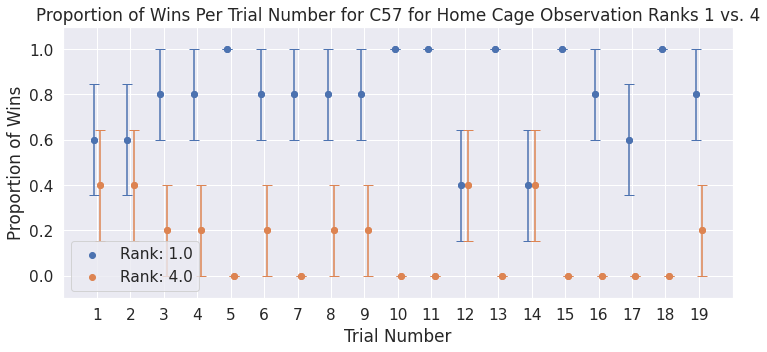

1.0
4.0


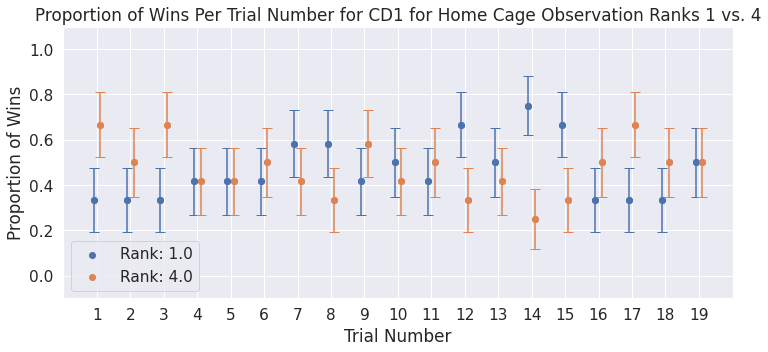

1.0
4.0


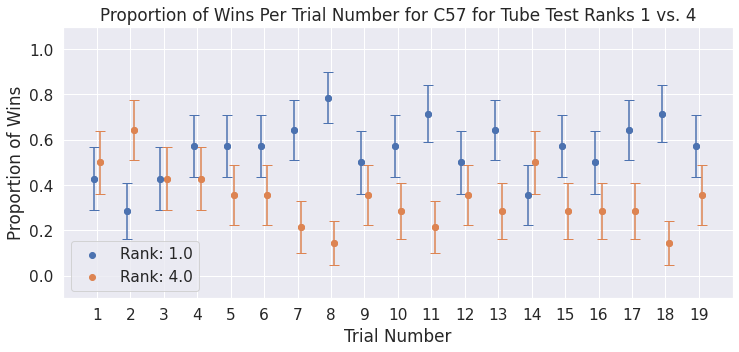

1.0
4.0


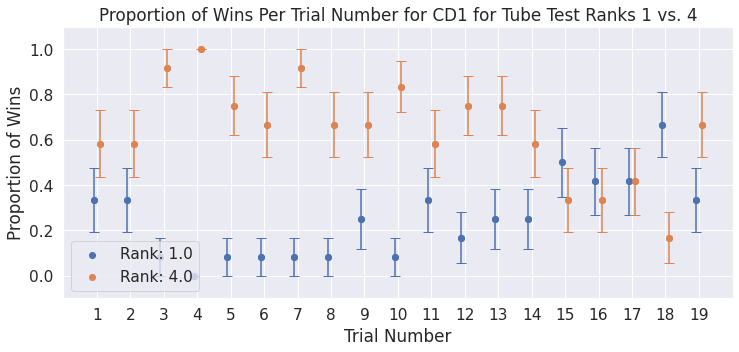

1.0
4.0


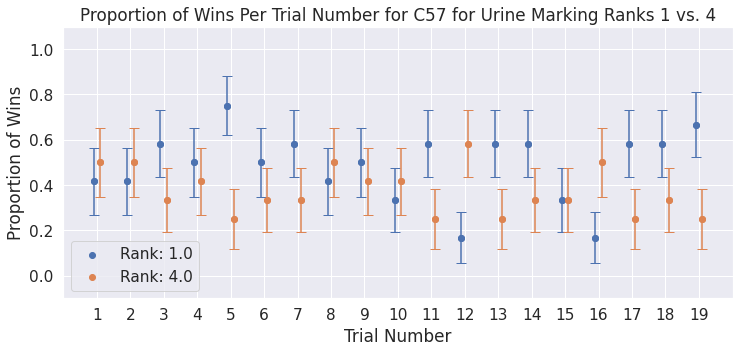

1.0
4.0


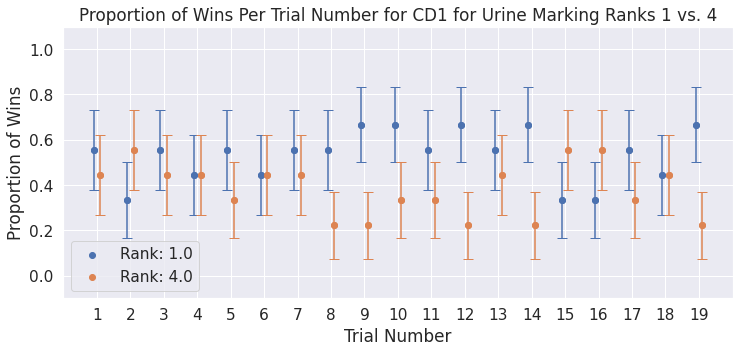

In [154]:
for key, item in assay_to_rank_1_4_df.items():
    for strain in assay_to_rank_1_4_df[key]["mean_df"]["strain"].unique():
        fig, ax = plt.subplots()
        # Transformations so that points can be differentiated on the same trial number
        trans1 = Affine2D().translate(-0.1, 0.0) + ax.transData
        trans2 = Affine2D().translate(+0.1, 0.0) + ax.transData
        transformation_list = [trans1, trans2]
        # Getting the rows for the current strain
        strain_mask = assay_to_rank_1_4_df[key]["mean_df"]["strain"] == strain
        strain_mean = assay_to_rank_1_4_df[key]["mean_df"][strain_mask]
        strain_sem = assay_to_rank_1_4_df[key]["sem_df"][strain_mask]
        strain_count = assay_to_rank_1_4_df[key]["count_df"][strain_mask]
        
        for rank in strain_mean[key].unique():
            print(rank)
            rank_index = list(strain_mean[key].unique()).index(rank)
            rank_mask = (strain_mean[key] == rank)
            rank_mean = strain_mean[rank_mask]
            rank_sem = strain_sem[rank_mask]
            rank_count = strain_count[rank_mask]
            plt.scatter(rank_mean["trial_number"], y=rank_mean["subject_is_winner"], label="Rank: {}".format(rank), transform=transformation_list[rank_index])
            plt.errorbar(rank_mean["trial_number"], rank_mean["subject_is_winner"], \
                         yerr=rank_sem["subject_is_winner"], fmt='o', transform=transformation_list[rank_index],\
                        capsize=5)

#         ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        ax.legend(loc='lower left')

        ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
        plt.xlabel("Trial Number")
        plt.ylabel("Proportion of Wins")
        assay_name_with_spaces = string.capwords(" ".join(key.split("_")[1:-1]))
        plt.title("Proportion of Wins Per Trial Number for {} for {} Ranks 1 vs. 4".format(strain, assay_name_with_spaces))
        plt.ylim((-0.1,1.1))
        plt.xticks(np.arange(assay_to_rank_1_4_df[key]["base_df"]["trial_number"].min(), assay_to_rank_1_4_df[key]["base_df"]["trial_number"].max()+1, 1.0))
        assay_name_with_underscore = "_".join(key.split("_")[1:-1])
        plt.savefig("./proc/reward_competition_plots/{}_reward_competition_per_trial_proportion_for_{}.svg".format(strain, assay_name_with_underscore))
        plt.show()

- Plotting with seperating the winners

In [156]:
from itertools import product

## Competition

In [159]:
pairwise_and_final_elo_score_df[pairwise_and_final_elo_score_df["rc_is_win_to_all_ratio_tie"]][["rc_win_to_win_plus_lost_ratio", "rc_win_to_all_ratio"]]

KeyError: 'rc_is_win_to_all_ratio_tie'

In [ ]:
plt.rcParams["figure.figsize"] = (12,7)


In [ ]:
c57_pairwise_and_final_elo_score_df = pairwise_and_final_elo_score_df[pairwise_and_final_elo_score_df["strain"] == "C57"]

In [ ]:
cd1_pairwise_and_final_elo_score_df = pairwise_and_final_elo_score_df[pairwise_and_final_elo_score_df["strain"] == "CD1"]

In [ ]:
plt.hist(pairwise_and_final_elo_score_df["rc_win_to_win_plus_lost_ratio"], alpha=0.5, label='wins to win + loss')
plt.hist(pairwise_and_final_elo_score_df["rc_win_to_all_ratio"], alpha=0.5, label='wins to all')
plt.axvline(pairwise_and_final_elo_score_df["rc_win_to_win_plus_lost_ratio"].abs().mean(), color='k', linestyle='-', linewidth=1, label="wins to win + loss average")
plt.axvline(pairwise_and_final_elo_score_df["rc_win_to_all_ratio"].abs().mean(), color='k', linestyle='--', linewidth=1, label="wins to all average")
plt.title("CD1 and C57 Reward Competition Win Percentages")
plt.xlabel("Ratio")
plt.ylabel("Number per ratio")
plt.legend(loc='upper left')
# plt.savefig("./proc/c57_pee_spots.png")
plt.show()

In [ ]:
plt.hist(c57_pairwise_and_final_elo_score_df["rc_win_to_win_plus_lost_ratio"], alpha=0.5, label='wins to win + loss')
plt.hist(c57_pairwise_and_final_elo_score_df["rc_win_to_all_ratio"], alpha=0.5, label='wins to all')
plt.axvline(c57_pairwise_and_final_elo_score_df["rc_win_to_win_plus_lost_ratio"].abs().mean(), color='k', linestyle='-', linewidth=1, label="wins to win + loss average")
plt.axvline(c57_pairwise_and_final_elo_score_df["rc_win_to_all_ratio"].abs().mean(), color='k', linestyle='--', linewidth=1, label="wins to all average")
plt.title("C57 Reward Competition Win Percentages")
plt.xlabel("Ratio")
plt.ylabel("Number per ratio")
plt.legend(loc='upper left')
# plt.savefig("./proc/c57_pee_spots.png")
plt.show()

In [ ]:
plt.hist(cd1_pairwise_and_final_elo_score_df["rc_win_to_win_plus_lost_ratio"], alpha=0.5, label='wins to win + loss')
plt.hist(cd1_pairwise_and_final_elo_score_df["rc_win_to_all_ratio"], alpha=0.5, label='wins to all')
plt.axvline(cd1_pairwise_and_final_elo_score_df["rc_win_to_win_plus_lost_ratio"].abs().mean(), color='k', linestyle='-', linewidth=1, label="wins to win + loss average")
plt.axvline(cd1_pairwise_and_final_elo_score_df["rc_win_to_all_ratio"].abs().mean(), color='k', linestyle='--', linewidth=1, label="wins to all average")
plt.title("CD1 Reward Competition Win Percentages")
plt.xlabel("Ratio")
plt.ylabel("Number per ratio")
plt.legend(loc='upper left')
# plt.savefig("./proc/c57_pee_spots.png")
plt.show()

## Percent Stable and percent unstable

In [ ]:
pairwise_and_final_elo_score_df.columns

In [ ]:
c57_pairwise_and_final_elo_score_df = pairwise_and_final_elo_score_df[pairwise_and_final_elo_score_df["strain"] == "C57"]

In [ ]:
cd1_pairwise_and_final_elo_score_df = pairwise_and_final_elo_score_df[pairwise_and_final_elo_score_df["strain"] == "CD1"]

In [ ]:
tie_columns = [col for col in pairwise_and_final_elo_score_df.columns if "tie" in col]

In [ ]:
tie_columns

In [ ]:
tie_columns = ['uma_number_then_percent_tie',
 'tt_percentage_tie',
 'hco_percentage_tie',
 'rc_is_win_to_all_ratio_tie']

In [ ]:
assay_to_strain_to_tie = defaultdict(dict)
for assay, strain in itertools.product(tie_columns, pairwise_and_final_elo_score_df["strain"].unique()):
    print(assay)
    print(strain)
    strain_df = pairwise_and_final_elo_score_df[pairwise_and_final_elo_score_df["strain"] == strain].dropna(subset=assay).copy()
    strain_df[assay] = strain_df[assay].astype(bool)
    assay_to_strain_to_tie[assay][strain] = len(strain_df[~strain_df[assay]]) / len(strain_df)

In [ ]:
assay_to_strain_to_tie

## Urine Marking Assay

In [160]:
urine_marking_file_paths = glob.glob("./**/*urine_marking_elo_score_history*.csv", recursive=True)

In [161]:
urine_marking_file_paths

['./pilot_1/proc/elo_score_spread_sheets/urine_marking_elo_score/cage_1_2_3_4_date_2022-05-18_2022-06-01/urine_marking_elo_score_history_cages_1_2_3_4_date_2022-05-18_2022-06-01.csv',
 './pilot_2/proc/elo_score_spread_sheets/urine_marking_elo_score/cage_1_2_3_4_5_6_date_2022-07-11_2022-08-08/urine_marking_elo_score_history_cages_1_2_3_4_5_6_date_2022-07-11_2022-08-08.csv',
 './pilot_3/proc/elo_score_spread_sheets/urine_marking_elo_score/cage_1_2_3_4_5_6_date_2022-09-12_2022-09-16/urine_marking_elo_score_history_cages_1_2_3_4_5_6_date_2022-09-12_2022-09-16.csv']

In [162]:
all_urine_marking_df = []
for file_path in urine_marking_file_paths:
    all_urine_marking_df.append(pd.read_csv(file_path, index_col=0))

In [163]:
combined_urine_marking_df = pd.concat(all_urine_marking_df)
combined_urine_marking_df = combined_urine_marking_df.reset_index(drop=True)

In [164]:
combined_urine_marking_df = combined_urine_marking_df.reset_index()

- For even rows, the left pee spots correspond to the subject's pee spots

In [165]:
even_urine_marking_df = combined_urine_marking_df[combined_urine_marking_df["index"] % 2 == 0].copy()

In [166]:
even_urine_marking_df.columns

Index(['index', 'total_match_number', 'subject_id', 'agent_id',
       'original_elo_score', 'updated_elo_score', 'win_draw_loss',
       'subject_ranking', 'agent_ranking', 'session_number_difference',
       'spot_percent_difference', 'loser', 'spot_number_then_percent_tie',
       'animal_id', 'ties', 'match', 'session_number', 'spot_number_tie',
       'date', 'sorted_animal_id', 'first_spot_number', 'id_to_spot_number',
       'spot_number_difference', 'spot_percent_tie', 'left_number_of_spots',
       'winner', 'right_number_of_spots', 'second_spot_number', 'cage',
       'processed_cage_number', 'experiment_type', 'strain', 'cohort',
       'notes'],
      dtype='object')

In [167]:
even_urine_marking_df = even_urine_marking_df.rename(columns={"subject_id": "left_subject_id"})
even_urine_marking_df = even_urine_marking_df.rename(columns={"subject_ranking": "left_ranking"})
even_urine_marking_df = even_urine_marking_df.rename(columns={"updated_elo_score": "left_elo_score"})
even_urine_marking_df = even_urine_marking_df.drop(columns=["agent_id", "agent_ranking", "right_number_of_spots", "original_elo_score"])
even_urine_marking_df.insert(0, 'matching_index', range(1, 1 + len(even_urine_marking_df)))

In [168]:
odd_urine_marking_df = combined_urine_marking_df[combined_urine_marking_df["index"] % 2 != 0].copy()

In [169]:
odd_urine_marking_df = odd_urine_marking_df.rename(columns={"subject_id": "right_subject_id"})
odd_urine_marking_df = odd_urine_marking_df.rename(columns={"subject_ranking": "right_ranking"})
odd_urine_marking_df = odd_urine_marking_df.rename(columns={"updated_elo_score": "right_elo_score"})
odd_urine_marking_df = odd_urine_marking_df.drop(columns=["agent_id", "agent_ranking", "left_number_of_spots", "original_elo_score"])
odd_urine_marking_df.insert(0, 'matching_index', range(1, 1 + len(odd_urine_marking_df)))

In [170]:
even_urine_marking_df.head()

,matching_index,index,total_match_number,left_subject_id,left_elo_score,win_draw_loss,left_ranking,session_number_difference,spot_percent_difference,loser,...,spot_percent_tie,left_number_of_spots,winner,second_spot_number,cage,processed_cage_number,experiment_type,strain,cohort,notes
0,1,0,1,1.1,1000.0,0.5,1,NaN,200.000000,1.3,...,False,4.0,1.1,0.0,CAGE1,1,urine_marking,C57,pilot_1,NaN
2,2,2,2,1.4,1010.0,1.0,1,0.0,200.000000,1.2,...,False,0.0,1.4,6.0,CAGE1,1,urine_marking,C57,pilot_1,NaN
4,3,4,3,1.2,1000.3,1.0,2,1.0,34.482759,1.1,...,False,12.0,1.2,17.0,CAGE1,1,urine_marking,C57,pilot_1,NaN
6,4,6,4,1.4,1019.7,1.0,1,0.0,200.000000,1.3,...,False,0.0,1.4,10.0,CAGE1,1,urine_marking,C57,pilot_1,NaN
8,5,8,5,1.1,990.6,0.5,3,1.0,18.181818,1.4,...,True,18.0,1.1,15.0,CAGE1,1,urine_marking,C57,pilot_1,NaN


In [171]:
odd_urine_marking_df.head()

,matching_index,index,total_match_number,right_subject_id,right_elo_score,win_draw_loss,right_ranking,session_number_difference,spot_percent_difference,loser,...,spot_percent_tie,winner,right_number_of_spots,second_spot_number,cage,processed_cage_number,experiment_type,strain,cohort,notes
1,1,1,1,1.3,1000.0,0.5,2,NaN,200.000000,1.3,...,False,1.1,0.0,0.0,CAGE1,1,urine_marking,C57,pilot_1,NaN
3,2,3,2,1.2,990.0,0.0,4,0.0,200.000000,1.2,...,False,1.4,6.0,6.0,CAGE1,1,urine_marking,C57,pilot_1,NaN
5,3,5,3,1.1,989.7,0.0,4,1.0,34.482759,1.1,...,False,1.2,17.0,17.0,CAGE1,1,urine_marking,C57,pilot_1,NaN
7,4,7,4,1.3,990.3,0.0,3,0.0,200.000000,1.3,...,False,1.4,10.0,10.0,CAGE1,1,urine_marking,C57,pilot_1,NaN
9,5,9,5,1.4,1018.8,0.5,1,1.0,18.181818,1.4,...,True,1.1,15.0,15.0,CAGE1,1,urine_marking,C57,pilot_1,NaN


In [172]:
cols_to_use = list(odd_urine_marking_df.columns.difference(even_urine_marking_df.columns))
cols_to_use.append("matching_index")

In [173]:
cols_to_use

['right_elo_score',
 'right_number_of_spots',
 'right_ranking',
 'right_subject_id',
 'matching_index']

In [174]:
urine_marking_left_right = pd.merge(even_urine_marking_df, odd_urine_marking_df[cols_to_use], left_on=["matching_index"], right_on=["matching_index"], how='outer')

In [175]:
urine_marking_left_right

,matching_index,index,total_match_number,left_subject_id,left_elo_score,win_draw_loss,left_ranking,session_number_difference,spot_percent_difference,loser,...,cage,processed_cage_number,experiment_type,strain,cohort,notes,right_elo_score,right_number_of_spots,right_ranking,right_subject_id
0,1,0,1,1.1,1000.0,0.5,1,NaN,200.000000,1.3,...,CAGE1,1,urine_marking,C57,pilot_1,NaN,1000.0,0.0,2,1.3
1,2,2,2,1.4,1010.0,1.0,1,0.0,200.000000,1.2,...,CAGE1,1,urine_marking,C57,pilot_1,NaN,990.0,6.0,4,1.2
2,3,4,3,1.2,1000.3,1.0,2,1.0,34.482759,1.1,...,CAGE1,1,urine_marking,C57,pilot_1,NaN,989.7,17.0,4,1.1
3,4,6,4,1.4,1019.7,1.0,1,0.0,200.000000,1.3,...,CAGE1,1,urine_marking,C57,pilot_1,NaN,990.3,10.0,3,1.3
4,5,8,5,1.1,990.6,0.5,3,1.0,18.181818,1.4,...,CAGE1,1,urine_marking,C57,pilot_1,NaN,1018.8,15.0,1,1.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,142,282,2,6.3,1010.0,1.0,1,0.0,88.607595,6.4,...,CAGE6,6,urine_marking,CD1,pilot_3,3 hours,990.0,22.0,4,6.4
142,143,284,3,6.3,1019.7,1.0,1,1.0,175.757576,6.1,...,CAGE6,6,urine_marking,CD1,pilot_3,3 hours,990.3,31.0,3,6.1
143,144,286,4,6.4,1000.3,1.0,2,0.0,66.666667,6.2,...,CAGE6,6,urine_marking,CD1,pilot_3,3 hours,989.7,10.0,4,6.2
144,145,288,5,6.4,1010.0,1.0,2,1.0,185.185185,6.1,...,CAGE6,6,urine_marking,CD1,pilot_3,3 hours,980.6,26.0,4,6.1


In [176]:
sorted(urine_marking_left_right.columns)

['animal_id',
 'cage',
 'cohort',
 'date',
 'experiment_type',
 'first_spot_number',
 'id_to_spot_number',
 'index',
 'left_elo_score',
 'left_number_of_spots',
 'left_ranking',
 'left_subject_id',
 'loser',
 'match',
 'matching_index',
 'notes',
 'processed_cage_number',
 'right_elo_score',
 'right_number_of_spots',
 'right_ranking',
 'right_subject_id',
 'second_spot_number',
 'session_number',
 'session_number_difference',
 'sorted_animal_id',
 'spot_number_difference',
 'spot_number_then_percent_tie',
 'spot_number_tie',
 'spot_percent_difference',
 'spot_percent_tie',
 'strain',
 'ties',
 'total_match_number',
 'win_draw_loss',
 'winner']

In [177]:
sorted_columns = ['experiment_type',
 'cohort',
 'cage',
 'processed_cage_number',
 'strain',
 'date',
 'match',
 'winner',
 'loser',
 'ties',
 'left_elo_score',
 'left_number_of_spots',
 'left_ranking',
 'left_subject_id',
 'right_elo_score',
 'right_number_of_spots',
 'right_ranking',
 'right_subject_id',
 'session_number',
 'session_number_difference',
 'total_match_number',
 'win_draw_loss',
 ]

In [178]:
urine_marking_left_right = urine_marking_left_right[sorted_columns]

In [179]:
urine_marking_left_right.head()

,experiment_type,cohort,cage,processed_cage_number,strain,date,match,winner,loser,ties,...,left_ranking,left_subject_id,right_elo_score,right_number_of_spots,right_ranking,right_subject_id,session_number,session_number_difference,total_match_number,win_draw_loss
0,urine_marking,pilot_1,CAGE1,1,C57,2022-05-19,1.1 v 1.3,1.1,1.3,NaN,...,1,1.1,1000.0,0.0,2,1.3,1.0,NaN,1,0.5
1,urine_marking,pilot_1,CAGE1,1,C57,2022-05-19,1.2 v 1.4,1.4,1.2,NaN,...,1,1.4,990.0,6.0,4,1.2,1.0,0.0,2,1.0
2,urine_marking,pilot_1,CAGE1,1,C57,2022-05-20,1.1 v 1.2,1.2,1.1,NaN,...,2,1.2,989.7,17.0,4,1.1,2.0,1.0,3,1.0
3,urine_marking,pilot_1,CAGE1,1,C57,2022-05-20,1.3 v 1.4,1.4,1.3,NaN,...,1,1.4,990.3,10.0,3,1.3,2.0,0.0,4,1.0
4,urine_marking,pilot_1,CAGE1,1,C57,2022-05-24,1.1 v 1.4,1.1,1.4,NaN,...,3,1.1,1018.8,15.0,1,1.4,3.0,1.0,5,0.5


In [180]:
urine_marking_left_right["left_subject_id"] = urine_marking_left_right["left_subject_id"].astype(str)
urine_marking_left_right["right_subject_id"] = urine_marking_left_right["right_subject_id"].astype(str)

/tmp/ipykernel_376/328799236.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  urine_marking_left_right["left_subject_id"] = urine_marking_left_right["left_subject_id"].astype(str)
/tmp/ipykernel_376/328799236.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  urine_marking_left_right["right_subject_id"] = urine_marking_left_right["right_subject_id"].astype(str)


In [181]:
merged_final_elo_score_df["subject_id"] = merged_final_elo_score_df["subject_id"].astype(str)

In [182]:
left_merged_final_elo_score_df = merged_final_elo_score_df

In [183]:
left_subject_column_renaming = {}
for col in left_merged_final_elo_score_df.columns:
    left_subject_column_renaming[col] = "left_" + col

In [184]:
left_merged_final_elo_score_df = left_merged_final_elo_score_df.rename(columns=left_subject_column_renaming)

In [185]:
right_merged_final_elo_score_df = merged_final_elo_score_df

In [186]:
right_subject_column_renaming = {}
for col in right_merged_final_elo_score_df.columns:
    right_subject_column_renaming[col] = "right_" + col

In [187]:
right_merged_final_elo_score_df = right_merged_final_elo_score_df.rename(columns=right_subject_column_renaming)

In [188]:
cols_to_use = list(urine_marking_left_right.columns.difference(left_merged_final_elo_score_df.columns))
# cols_to_use.append("cohort")
cols_to_use.append("left_subject_id")

In [189]:
cols_to_use


['cage',
 'cohort',
 'date',
 'experiment_type',
 'left_elo_score',
 'left_number_of_spots',
 'left_ranking',
 'loser',
 'match',
 'processed_cage_number',
 'right_elo_score',
 'right_number_of_spots',
 'right_ranking',
 'right_subject_id',
 'session_number',
 'session_number_difference',
 'strain',
 'ties',
 'total_match_number',
 'win_draw_loss',
 'winner',
 'left_subject_id']

In [190]:
urine_and_elo_score_df = pd.merge(urine_marking_left_right[cols_to_use], left_merged_final_elo_score_df, left_on=["left_subject_id", "cohort"], right_on=["left_subject_id", "left_cohort"], how='inner')

In [191]:
cols_to_use = list(urine_and_elo_score_df.columns.difference(right_merged_final_elo_score_df.columns))
cols_to_use.append("right_subject_id")

In [192]:
urine_and_elo_score_df = pd.merge(urine_and_elo_score_df[cols_to_use], right_merged_final_elo_score_df, left_on=["right_subject_id", "cohort"], right_on=["right_subject_id", "right_cohort"], how='inner')

In [193]:
urine_and_elo_score_df["pee_spot_difference"] = urine_and_elo_score_df["left_number_of_spots"] - urine_and_elo_score_df["right_number_of_spots"]
urine_and_elo_score_df["tube_test_elo_score_difference"] = urine_and_elo_score_df["left_tube_test_final_elo_score"] - urine_and_elo_score_df["right_tube_test_final_elo_score"]
urine_and_elo_score_df["home_cage_observation_elo_score_difference"] = urine_and_elo_score_df["left_home_cage_observation_final_elo_score"] - urine_and_elo_score_df["right_home_cage_observation_final_elo_score"]
urine_and_elo_score_df["reward_competition_elo_score_difference"] = urine_and_elo_score_df["left_reward_competition_final_elo_score"] - urine_and_elo_score_df["right_reward_competition_final_elo_score"]

urine_and_elo_score_df["tube_test_rank_difference"] = urine_and_elo_score_df["left_tube_test_rank"] - urine_and_elo_score_df["right_tube_test_rank"]
urine_and_elo_score_df["home_cage_observation_rank_difference"] = urine_and_elo_score_df["left_home_cage_observation_rank"] - urine_and_elo_score_df["right_home_cage_observation_rank"]
urine_and_elo_score_df["reward_competition_rank_difference"] = urine_and_elo_score_df["left_reward_competition_rank"] - urine_and_elo_score_df["right_reward_competition_rank"]


In [194]:
sorted(urine_and_elo_score_df.columns)

['cage',
 'cohort',
 'date',
 'experiment_type',
 'home_cage_observation_elo_score_difference',
 'home_cage_observation_rank_difference',
 'left_cohort',
 'left_elo_score',
 'left_home_cage_observation_final_elo_score',
 'left_home_cage_observation_rank',
 'left_number_of_spots',
 'left_ranking',
 'left_reward_competition_final_elo_score',
 'left_reward_competition_rank',
 'left_subject_id',
 'left_tube_test_final_elo_score',
 'left_tube_test_rank',
 'left_urine_marking_final_elo_score',
 'left_urine_marking_rank',
 'loser',
 'match',
 'pee_spot_difference',
 'processed_cage_number',
 'reward_competition_elo_score_difference',
 'reward_competition_rank_difference',
 'right_cohort',
 'right_elo_score',
 'right_home_cage_observation_final_elo_score',
 'right_home_cage_observation_rank',
 'right_number_of_spots',
 'right_ranking',
 'right_reward_competition_final_elo_score',
 'right_reward_competition_rank',
 'right_subject_id',
 'right_tube_test_final_elo_score',
 'right_tube_test_rank',

In [195]:
sorted_columns = ['cohort',
 'cage',
 'processed_cage_number',
 'strain',

 'date',
 'winner',
 'loser',
 'ties',

 'left_subject_id',
 'left_elo_score',
 'left_ranking',
 'right_subject_id',
 'right_elo_score',
 'right_ranking',
 'left_number_of_spots',
 'right_number_of_spots',
 'pee_spot_difference', 
 'tube_test_elo_score_difference',
 'home_cage_observation_elo_score_difference',
 'reward_competition_elo_score_difference',
 'tube_test_rank_difference',
 'home_cage_observation_rank_difference',
 'reward_competition_rank_difference',  
                  
 'left_home_cage_observation_final_elo_score',
 'left_home_cage_observation_rank',
 'left_reward_competition_final_elo_score',
 'left_reward_competition_rank',
 'left_tube_test_final_elo_score',
 'left_tube_test_rank',
 'left_urine_marking_final_elo_score',
 'left_urine_marking_rank',

 'right_home_cage_observation_final_elo_score',
 'right_home_cage_observation_rank',
 'right_reward_competition_final_elo_score',
 'right_reward_competition_rank',
 'right_tube_test_final_elo_score',
 'right_tube_test_rank',
 'right_urine_marking_final_elo_score',
 'right_urine_marking_rank',

 'session_number',
 'session_number_difference',
 'total_match_number']

In [196]:
urine_and_elo_score_df = urine_and_elo_score_df[sorted_columns]

In [197]:
urine_and_elo_score_df

,cohort,cage,processed_cage_number,strain,date,winner,loser,ties,left_subject_id,left_elo_score,...,right_home_cage_observation_rank,right_reward_competition_final_elo_score,right_reward_competition_rank,right_tube_test_final_elo_score,right_tube_test_rank,right_urine_marking_final_elo_score,right_urine_marking_rank,session_number,session_number_difference,total_match_number
0,pilot_1,CAGE1,1,C57,2022-05-19,1.1,1.3,NaN,1.1,1000.0,...,NaN,900.9,4.0,775.7,4.0,972.0,4.0,1.0,NaN,1
1,pilot_1,CAGE1,1,C57,2022-05-26,1.1,1.3,tie,1.1,1010.3,...,NaN,900.9,4.0,775.7,4.0,972.0,4.0,5.0,1.0,9
2,pilot_1,CAGE1,1,C57,2022-05-20,1.4,1.3,NaN,1.4,1019.7,...,NaN,900.9,4.0,775.7,4.0,972.0,4.0,2.0,0.0,4
3,pilot_1,CAGE1,1,C57,2022-05-25,1.4,1.3,tie,1.4,1028.0,...,NaN,900.9,4.0,775.7,4.0,972.0,4.0,4.0,0.0,8
4,pilot_1,CAGE1,1,C57,2022-05-24,1.2,1.3,tie,1.2,1000.0,...,NaN,900.9,4.0,775.7,4.0,972.0,4.0,3.0,0.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,pilot_3,CAGE6,6,CD1,2022-09-16,6.3,6.2,NaN,6.3,1028.8,...,NaN,752.6,4.0,1021.2,2.0,980.6,3.0,3.0,0.0,6
142,pilot_3,CAGE6,6,CD1,2022-09-13,6.4,6.2,NaN,6.4,1000.3,...,NaN,752.6,4.0,1021.2,2.0,980.6,3.0,2.0,0.0,4
143,pilot_3,CAGE6,6,CD1,2022-09-12,6.3,6.4,NaN,6.3,1010.0,...,NaN,1021.0,2.0,834.5,4.0,1010.0,2.0,1.0,0.0,2
144,pilot_3,CAGE6,6,CD1,2022-09-13,6.3,6.1,NaN,6.3,1019.7,...,NaN,991.0,3.0,1137.7,1.0,980.6,3.0,2.0,1.0,3


In [198]:
urine_and_elo_score_df.to_csv("./proc/urine_marking_with_all_elo_score.csv")

In [199]:
urine_and_elo_score_df.dropna(axis=1)

,cohort,cage,processed_cage_number,strain,date,winner,loser,left_subject_id,left_elo_score,left_ranking,...,left_urine_marking_final_elo_score,left_urine_marking_rank,right_reward_competition_final_elo_score,right_reward_competition_rank,right_tube_test_final_elo_score,right_tube_test_rank,right_urine_marking_final_elo_score,right_urine_marking_rank,session_number,total_match_number
0,pilot_1,CAGE1,1,C57,2022-05-19,1.1,1.3,1.1,1000.0,1,...,1010.3,2.0,900.9,4.0,775.7,4.0,972.0,4.0,1.0,1
1,pilot_1,CAGE1,1,C57,2022-05-26,1.1,1.3,1.1,1010.3,2,...,1010.3,2.0,900.9,4.0,775.7,4.0,972.0,4.0,5.0,9
2,pilot_1,CAGE1,1,C57,2022-05-20,1.4,1.3,1.4,1019.7,1,...,1016.9,1.0,900.9,4.0,775.7,4.0,972.0,4.0,2.0,4
3,pilot_1,CAGE1,1,C57,2022-05-25,1.4,1.3,1.4,1028.0,1,...,1016.9,1.0,900.9,4.0,775.7,4.0,972.0,4.0,4.0,8
4,pilot_1,CAGE1,1,C57,2022-05-24,1.2,1.3,1.2,1000.0,2,...,1000.8,3.0,900.9,4.0,775.7,4.0,972.0,4.0,3.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,pilot_3,CAGE6,6,CD1,2022-09-16,6.3,6.2,6.3,1028.8,1,...,1028.8,1.0,752.6,4.0,1021.2,2.0,980.6,3.0,3.0,6
142,pilot_3,CAGE6,6,CD1,2022-09-13,6.4,6.2,6.4,1000.3,2,...,1010.0,2.0,752.6,4.0,1021.2,2.0,980.6,3.0,2.0,4
143,pilot_3,CAGE6,6,CD1,2022-09-12,6.3,6.4,6.3,1010.0,1,...,1028.8,1.0,1021.0,2.0,834.5,4.0,1010.0,2.0,1.0,2
144,pilot_3,CAGE6,6,CD1,2022-09-13,6.3,6.1,6.3,1019.7,1,...,1028.8,1.0,991.0,3.0,1137.7,1.0,980.6,3.0,2.0,3


In [200]:
urine_and_elo_score_df.columns.difference(urine_and_elo_score_df.dropna(axis=1).columns)

Index(['home_cage_observation_elo_score_difference',
       'home_cage_observation_rank_difference',
       'left_home_cage_observation_final_elo_score',
       'left_home_cage_observation_rank',
       'right_home_cage_observation_final_elo_score',
       'right_home_cage_observation_rank', 'session_number_difference',
       'ties'],
      dtype='object')

# Plotting

In [201]:
urine_and_elo_score_df["winner_number_of_spots"] = urine_and_elo_score_df.apply(lambda x: x["left_number_of_spots"] if x["left_number_of_spots"] >= x["right_number_of_spots"] else x["right_number_of_spots"], axis = 1)
urine_and_elo_score_df["loser_number_of_spots"] = urine_and_elo_score_df.apply(lambda x: x["left_number_of_spots"] if x["left_number_of_spots"] <= x["right_number_of_spots"] else x["right_number_of_spots"], axis = 1)

In [202]:
urine_and_elo_score_df.columns

Index(['cohort', 'cage', 'processed_cage_number', 'strain', 'date', 'winner',
       'loser', 'ties', 'left_subject_id', 'left_elo_score', 'left_ranking',
       'right_subject_id', 'right_elo_score', 'right_ranking',
       'left_number_of_spots', 'right_number_of_spots', 'pee_spot_difference',
       'tube_test_elo_score_difference',
       'home_cage_observation_elo_score_difference',
       'reward_competition_elo_score_difference', 'tube_test_rank_difference',
       'home_cage_observation_rank_difference',
       'reward_competition_rank_difference',
       'left_home_cage_observation_final_elo_score',
       'left_home_cage_observation_rank',
       'left_reward_competition_final_elo_score',
       'left_reward_competition_rank', 'left_tube_test_final_elo_score',
       'left_tube_test_rank', 'left_urine_marking_final_elo_score',
       'left_urine_marking_rank',
       'right_home_cage_observation_final_elo_score',
       'right_home_cage_observation_rank',
       'right_reward

In [203]:
urine_and_elo_score_df["adjusted_winner_number_of_spots"] = urine_and_elo_score_df["winner_number_of_spots"].apply(lambda x: 100 if x >= 100 else x)
urine_and_elo_score_df["adjusted_loser_number_of_spots"] = urine_and_elo_score_df["loser_number_of_spots"].apply(lambda x: 100 if x >= 100 else x)
urine_and_elo_score_df["adjusted_pee_spot_difference"] = urine_and_elo_score_df["pee_spot_difference"].abs().apply(lambda x: 100 if x >= 100 else x)

In [204]:
os.makedirs("./proc/urine_marking_plots", exist_ok=True)

In [205]:
c57_df = urine_and_elo_score_df[urine_and_elo_score_df["strain"] == "C57"]

In [216]:
x_max = urine_and_elo_score_df["winner_number_of_spots"].max()

In [295]:
y_max = 60

In [296]:
bins = 20

In [297]:
bin_width = 10

In [305]:
bins=range(int(urine_and_elo_score_df["winner_number_of_spots"].min()), int(urine_and_elo_score_df["winner_number_of_spots"].max()) + bin_width, bin_width)


In [299]:
import matplotlib as mpl
mpl.rc('font',family='Arial')

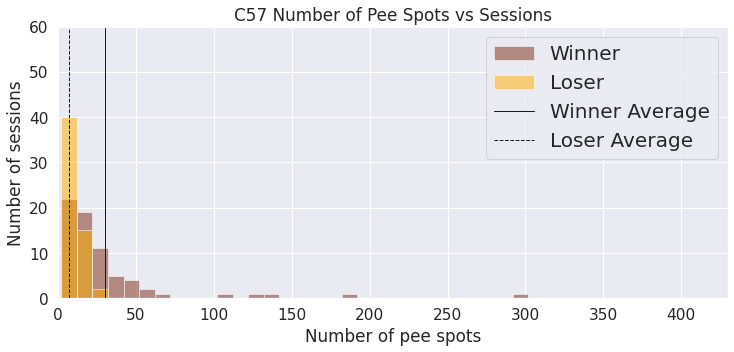

In [311]:
plt.hist(c57_df["winner_number_of_spots"], bins, alpha=0.5, label='Winner', color="#792910")
plt.hist(c57_df["loser_number_of_spots"], bins, alpha=0.5, label='Loser', color="#FFAF00")


plt.axvline(c57_df["winner_number_of_spots"].abs().mean(), color='k', linestyle='-', linewidth=1, label="Winner Average")
plt.axvline(c57_df["loser_number_of_spots"].abs().mean(), color='k', linestyle='--', linewidth=1, label="Loser Average")

plt.title("C57 Number of Pee Spots vs Sessions", family="Arial")
plt.xlabel("Number of pee spots")
plt.ylabel("Number of sessions")
plt.legend(loc='upper right', prop={ 'size':20})
plt.xlim((0, x_max))
plt.ylim((0,y_max))
plt.savefig("./proc/urine_marking_plots/c57_pee_spots.svg")
plt.show()

In [312]:
cd1_df = urine_and_elo_score_df[urine_and_elo_score_df["strain"] == "CD1"]

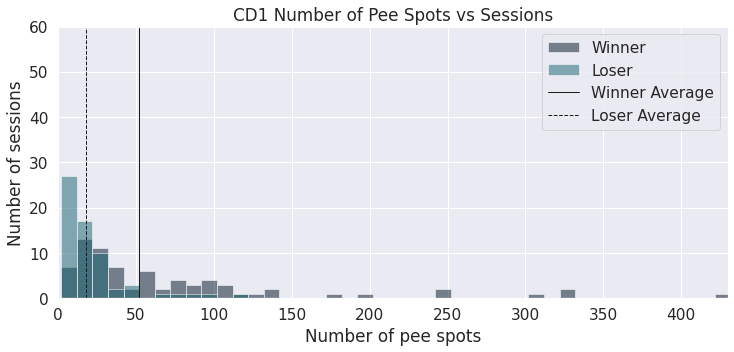

In [313]:
bins=range(int(cd1_df["winner_number_of_spots"].min()), int(cd1_df["winner_number_of_spots"].max()) + bin_width, bin_width)

plt.hist(cd1_df["winner_number_of_spots"], bins, alpha=0.5, label='Winner', color="#001424")
plt.hist(cd1_df["loser_number_of_spots"], bins, alpha=0.5, label='Loser', color="#15616f")

plt.axvline(cd1_df["adjusted_winner_number_of_spots"].abs().mean(), color='k', linestyle='-', linewidth=1, label="Winner Average")
plt.axvline(cd1_df["adjusted_loser_number_of_spots"].abs().mean(), color='k', linestyle='--', linewidth=1, label="Loser Average")

plt.title("CD1 Number of Pee Spots vs Sessions", family="Arial")
plt.xlabel("Number of pee spots")
plt.ylabel("Number of sessions")
plt.legend(loc='upper right')
plt.xlim((0, x_max))
plt.ylim((0,y_max))
plt.savefig("./proc/urine_marking_plots/cd1_pee_spots.svg")
plt.show()

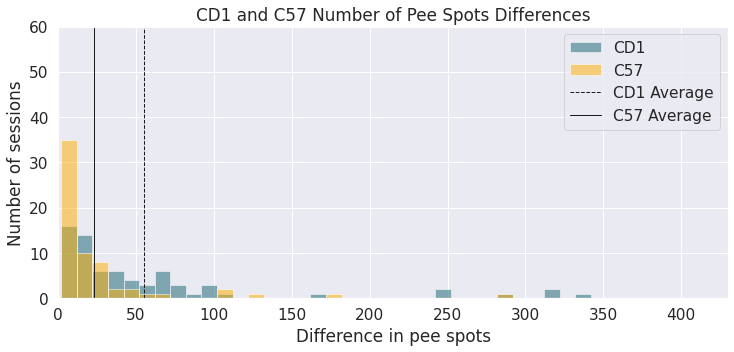

In [314]:


plt.hist(cd1_df["pee_spot_difference"].abs(), bins, alpha=0.5, label='CD1', color="#15616f")
plt.hist(c57_df["pee_spot_difference"].abs(), bins, alpha=0.5, label='C57', color="#ffaf00")


# plt.hist(c57_df["pee_spot_difference"], bins, alpha=0.5, label='Difference')
plt.title("CD1 and C57 Number of Pee Spots Differences", family="Arial")
plt.xlabel("Difference in pee spots")
plt.axvline(cd1_df["pee_spot_difference"].abs().mean(), color='k', linestyle='--', linewidth=1, label="CD1 Average")
plt.axvline(c57_df["pee_spot_difference"].abs().mean(), color='k', linestyle='-', linewidth=1, label="C57 Average")

plt.ylabel("Number of sessions")
plt.legend(loc='upper right')
plt.xlim((0, x_max))
plt.ylim((0,y_max))
plt.savefig("./proc/urine_marking_plots/pee_spot_difference.svg")

plt.show()

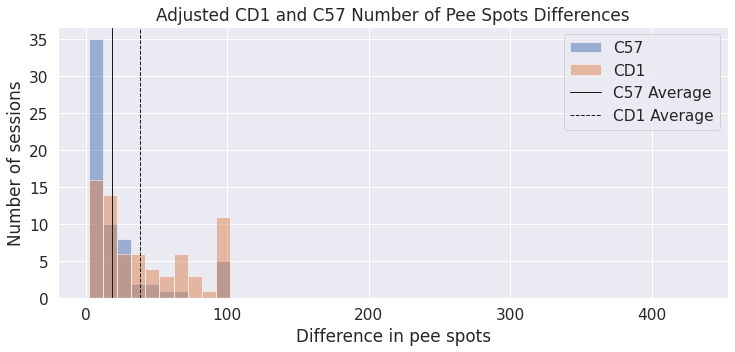

In [310]:
plt.hist(c57_df["adjusted_pee_spot_difference"].abs(), bins, alpha=0.5, label='C57')
plt.hist(cd1_df["adjusted_pee_spot_difference"].abs(), bins, alpha=0.5, label='CD1')

# plt.hist(c57_df["pee_spot_difference"], bins, alpha=0.5, label='Difference')
plt.title("Adjusted CD1 and C57 Number of Pee Spots Differences")
plt.xlabel("Difference in pee spots")
plt.axvline(c57_df["adjusted_pee_spot_difference"].abs().mean(), color='k', linestyle='-', linewidth=1, label="C57 Average")
plt.axvline(cd1_df["adjusted_pee_spot_difference"].abs().mean(), color='k', linestyle='--', linewidth=1, label="CD1 Average")

plt.ylabel("Number of sessions")
plt.legend(loc='upper right')
plt.savefig("./proc/adjusted_pee_spot_difference.png")

plt.show()

In [ ]:
urine_and_elo_score_df[urine_and_elo_score_df["left_number_of_spots"] >= 100]

In [ ]:
urine_and_elo_score_df[urine_and_elo_score_df["right_number_of_spots"] >= 100]